In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as pt
import seaborn as sns
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from matplotlib.axes import Axes

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
data.shape

(2000, 21)

In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
a=data.nunique()
print(a)

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64


In [11]:
data.n_cores.value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

In [12]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [13]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
data.drop_duplicates()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [15]:
data.mean()

battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
price_range         1.50000
dtype: float64

In [16]:
data.median()

battery_power    1226.0
blue                0.0
clock_speed         1.5
dual_sim            1.0
fc                  3.0
four_g              1.0
int_memory         32.0
m_dep               0.5
mobile_wt         141.0
n_cores             4.0
pc                 10.0
px_height         564.0
px_width         1247.0
ram              2146.5
sc_h               12.0
sc_w                5.0
talk_time          11.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         1.5
dtype: float64

In [17]:
data.min()

battery_power    501.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 0.0
four_g             0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 0.0
px_height          0.0
px_width         500.0
ram              256.0
sc_h               5.0
sc_w               0.0
talk_time          2.0
three_g            0.0
touch_screen       0.0
wifi               0.0
price_range        0.0
dtype: float64

In [18]:
data.max()

battery_power    1998.0
blue                1.0
clock_speed         3.0
dual_sim            1.0
fc                 19.0
four_g              1.0
int_memory         64.0
m_dep               1.0
mobile_wt         200.0
n_cores             8.0
pc                 20.0
px_height        1960.0
px_width         1998.0
ram              3998.0
sc_h               19.0
sc_w               18.0
talk_time          20.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         3.0
dtype: float64

In [19]:
# Show all columns
columns = list(data.columns)
for i, column in enumerate(columns):
    print(i+1, ':', column)

1 : battery_power
2 : blue
3 : clock_speed
4 : dual_sim
5 : fc
6 : four_g
7 : int_memory
8 : m_dep
9 : mobile_wt
10 : n_cores
11 : pc
12 : px_height
13 : px_width
14 : ram
15 : sc_h
16 : sc_w
17 : talk_time
18 : three_g
19 : touch_screen
20 : wifi
21 : price_range


In [20]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

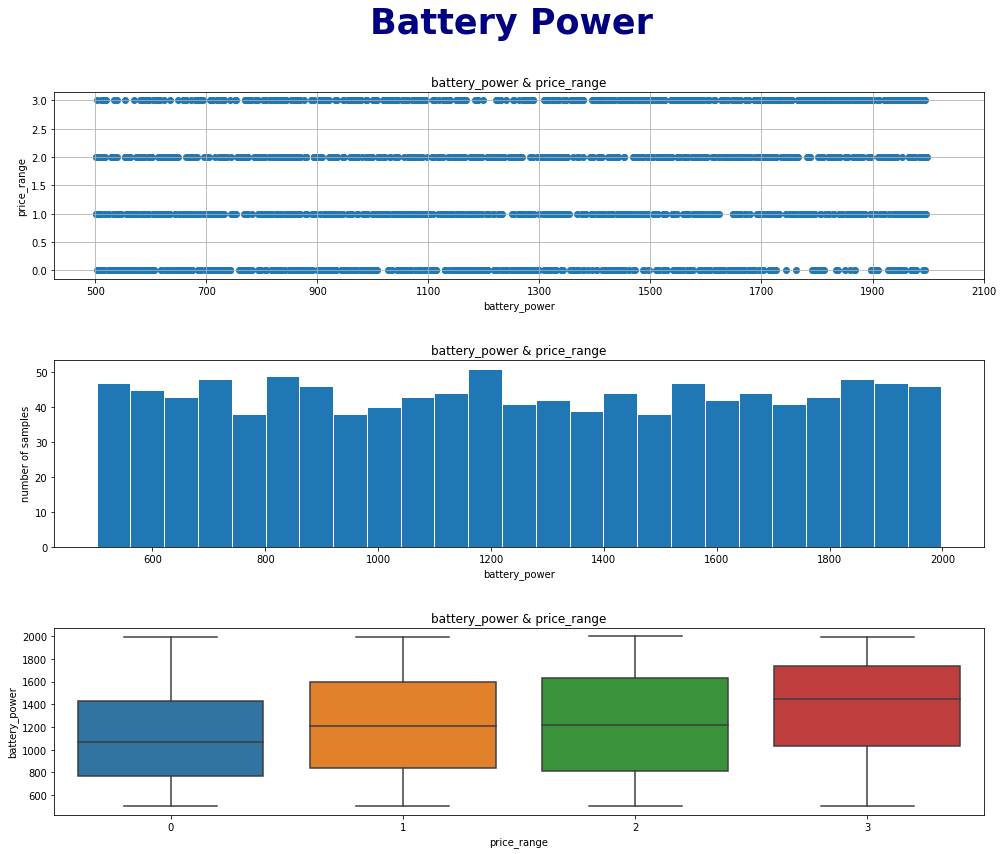

In [21]:
# Col 1 : battery_power

title = 'battery_power & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Battery Power', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax1 ---> scatter
ax1.scatter(data.battery_power, data.price_range)
ax1.set(title=title, xlabel='battery_power', ylabel='price_range', xticks=np.arange(500, 2200, 200))
ax1.grid()


# ax 2
x = data.battery_power.value_counts().sort_values().index
y = data.battery_power.value_counts().sort_values()
ax2.hist(x, bins=25, histtype='bar', edgecolor='white')
ax2.set(title=title, xlabel='battery_power', ylabel='number of samples')


# ax3 ---> boxplot
sns.boxplot(x='price_range', y='battery_power', data=data).set(title=title)

pt.show()

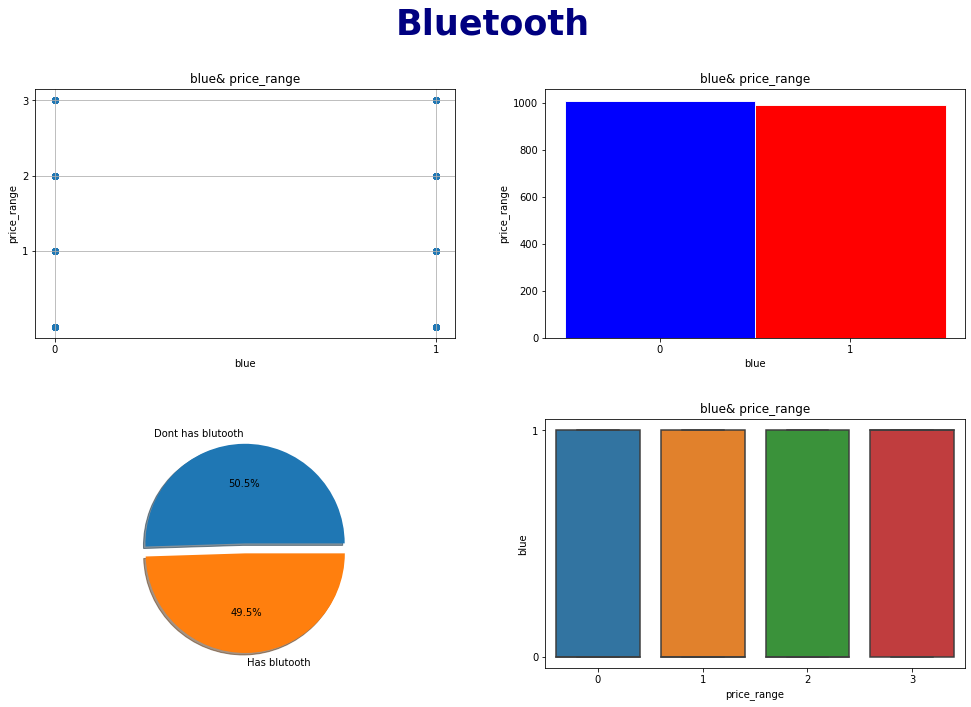

In [22]:
# Col 2 : blue               

title = 'blue& price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Bluetooth', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(data.blue, data.price_range)
ax[0, 0].set(title=title, xlabel='blue', ylabel='price_range', xticks=np.arange(0, 1.5), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue']
x = data.blue.value_counts().sort_values().index
y = data.blue.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].set(title=title, xlabel='blue', ylabel='price_range', xticks=np.arange(0, 1.5))


# ax 3
d = data[['blue']]
d = d.groupby('blue').size()
labels = ['Dont has blutooth', 'Has blutooth']
explode = (0, 0.1)
ax[1, 0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='blue', data=data).set(title=title, yticks=np.arange(0, 1.5))

pt.show()

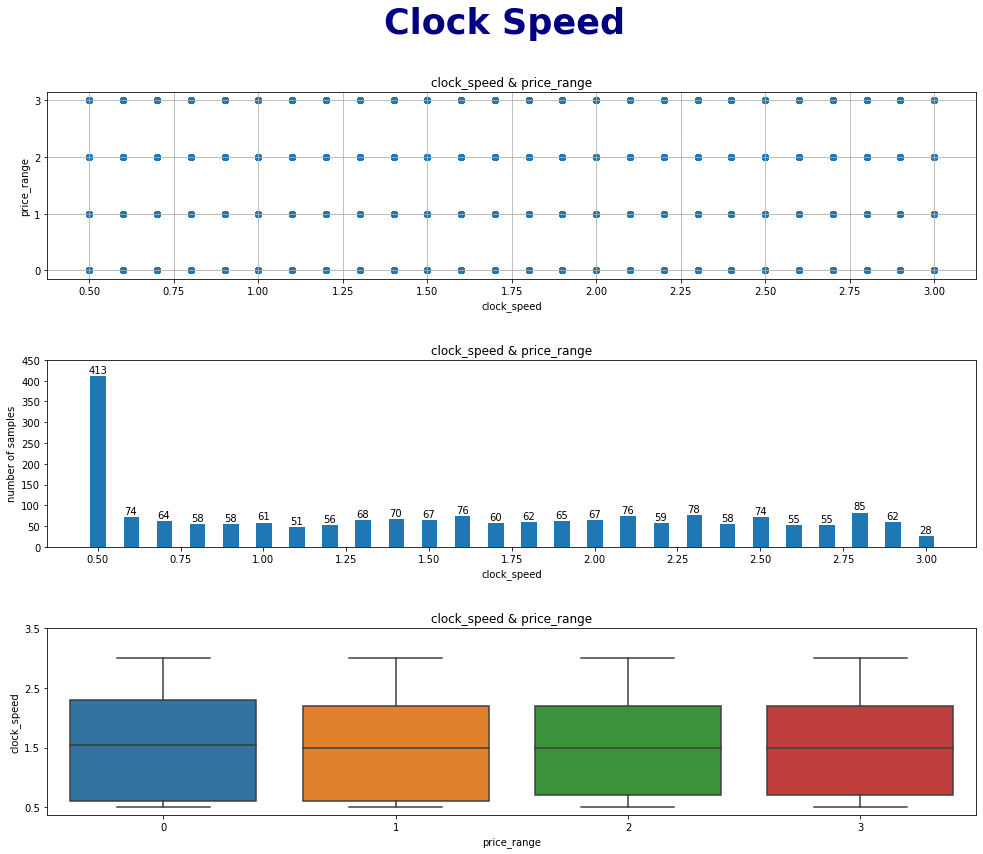

In [23]:
# Col 3 : clock_speed

title = 'clock_speed & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Clock Speed', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax1 ---> scatter
ax1.scatter(data.clock_speed, data.price_range)
ax1.set(title=title, xlabel='clock_speed', ylabel='price_range', xticks=np.arange(0.5, 3.25, 0.25), yticks=np.arange(0, 4))
ax1.grid()


# ax 2
x = data.clock_speed.value_counts().sort_values().index
y = data.clock_speed.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.05, edgecolor="white")
ax2.bar_label(bar_container)
ax2.set(title=title, xlabel='clock_speed', ylabel='number of samples', xticks=np.arange(0.5, 3.1, 0.25), yticks=np.arange(0, 460, 50))


# ax3 ---> boxplot
sns.boxplot(x='price_range', y='clock_speed', data=data).set(title=title, yticks=np.arange(0.5, 4))


pt.show()

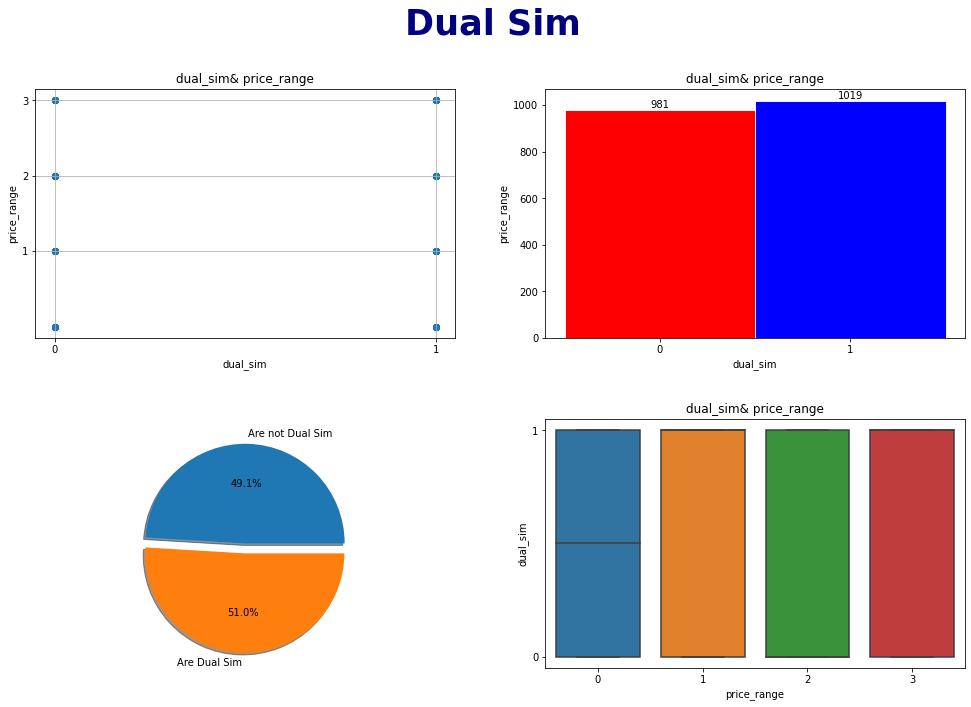

In [24]:
# Col 4 : dual_sim               

title = 'dual_sim& price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Dual Sim', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(data.dual_sim, data.price_range)
ax[0, 0].set(title=title, xlabel='dual_sim', ylabel='price_range', xticks=np.arange(0, 1.5), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue']
x = data.dual_sim.value_counts().sort_values().index
y = data.dual_sim.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='dual_sim', ylabel='price_range', xticks=np.arange(0, 1.5))


# ax 3
d = data[['dual_sim']]
d = d.groupby('dual_sim').size()
labels = ['Are not Dual Sim', 'Are Dual Sim']
explode = (0, 0.1)
ax[1, 0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='dual_sim', data=data).set(title=title, yticks=np.arange(0, 1.5))

pt.show()

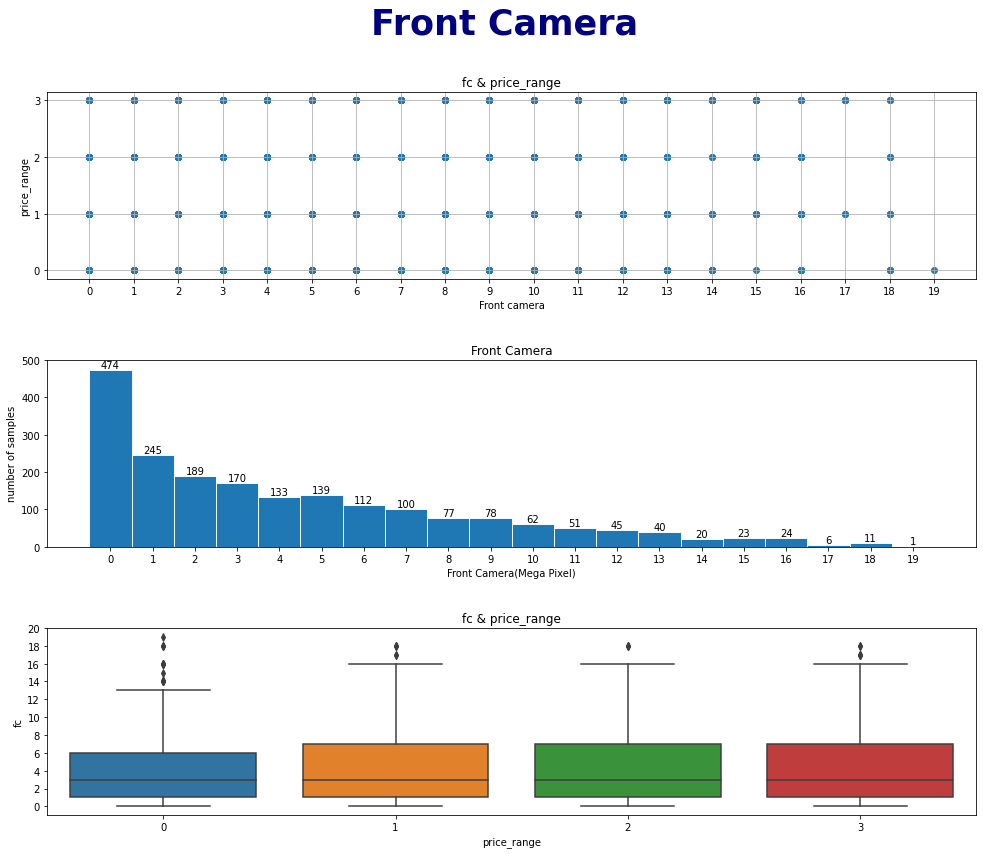

In [25]:
# Col 5 : fc (Front camera)

title = 'fc & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Front Camera', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data.fc, data.price_range)
ax1.set(title=title, xlabel='Front camera', ylabel='price_range', xticks=np.arange(0, 20), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data.fc.value_counts().sort_values().index
y = data.fc.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='Front Camera', xlabel='Front Camera(Mega Pixel)', ylabel='number of samples', xticks=np.arange(0, 20, 1), yticks=np.arange(0, 510, 100))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='fc', data=data).set(title=title, yticks=np.arange(0, 21, 2))

pt.show()

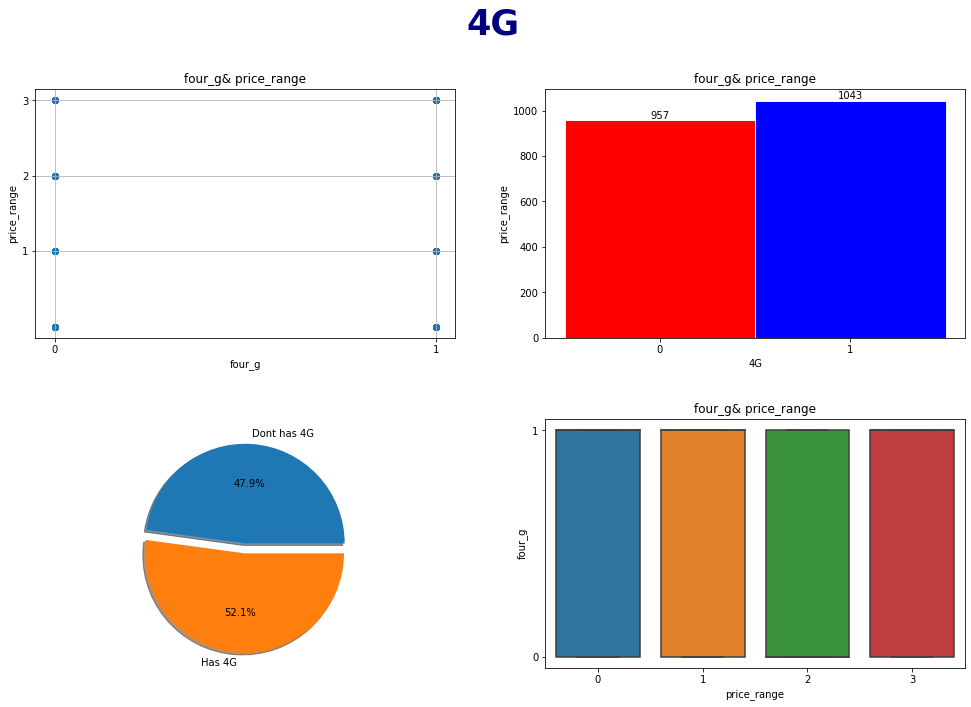

In [26]:
# Col 6 : four_g               

title = 'four_g& price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('4G', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(data.four_g, data.price_range)
ax[0, 0].set(title=title, xlabel='four_g', ylabel='price_range', xticks=np.arange(0, 1.5), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue']
x = data.four_g.value_counts().sort_values().index
y = data.four_g.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='4G', ylabel='price_range', xticks=np.arange(0, 1.5))


# ax 3
d = data[['four_g']]
d = d.groupby('four_g').size()
labels = ['Dont has 4G', 'Has 4G']
explode = (0, 0.1)
ax[1, 0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='four_g', data=data).set(title=title, yticks=np.arange(0, 1.5))

pt.show()

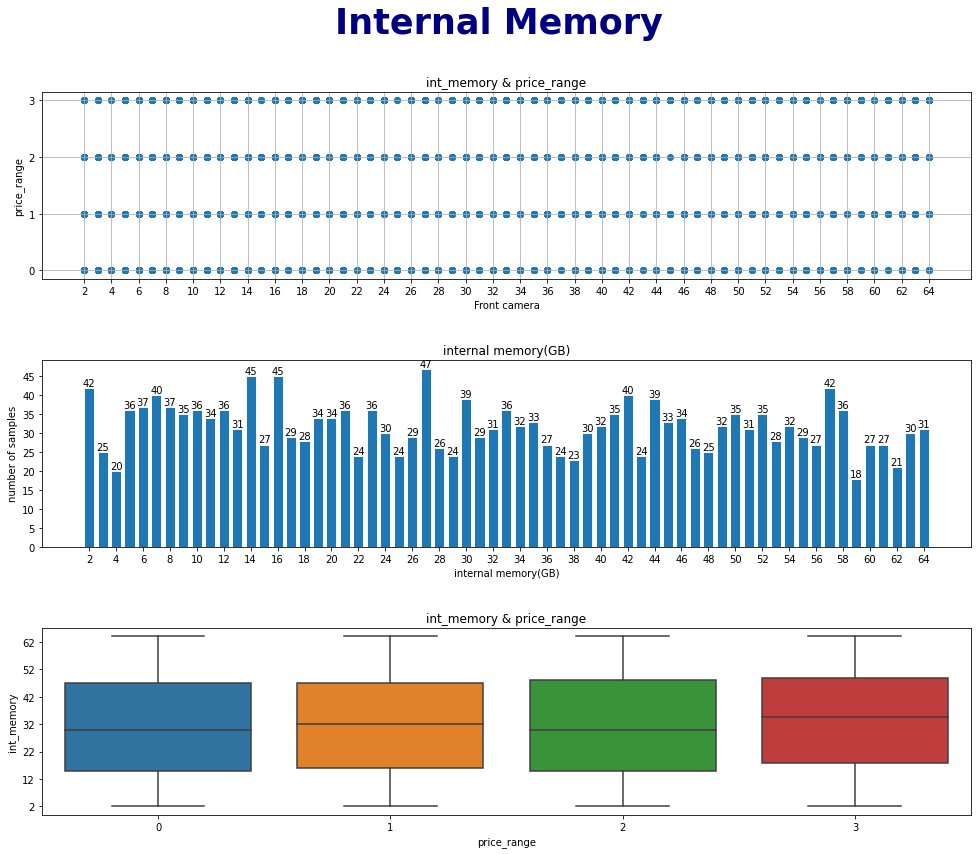

In [27]:
# Col 7 : int_memory

title = 'int_memory & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Internal Memory', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data.int_memory, data.price_range)
ax1.set(title=title, xlabel='Front camera', ylabel='price_range', xticks=np.arange(2, 65, 2), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data.int_memory.value_counts().sort_values().index
y = data.int_memory.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.75, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='internal memory(GB)', xlabel='internal memory(GB)', ylabel='number of samples', xticks=np.arange(2, 65, 2), yticks=np.arange(0, 50, 5))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='int_memory', data=data).set(title=title, yticks=np.arange(2, 70, 10))

pt.show()

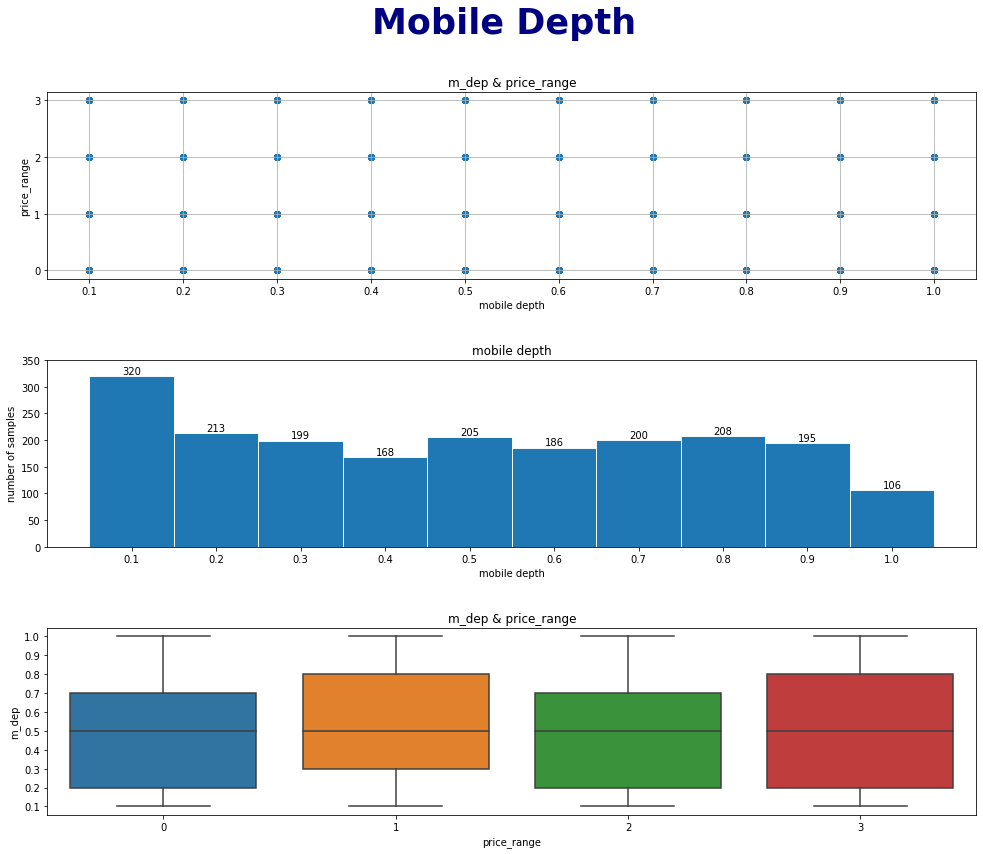

In [28]:
# Col 8 : m_dep

title = 'm_dep & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Mobile Depth', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data.m_dep, data.price_range)
ax1.set(title=title, xlabel='mobile depth', ylabel='price_range', xticks=np.arange(0.1, 1.1, 0.1), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data.m_dep.value_counts().sort_values().index
y = data.m_dep.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.1, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='mobile depth', xlabel='mobile depth', ylabel='number of samples', xticks=np.arange(0.1, 1.1, 0.1), yticks=np.arange(0, 360, 50))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='m_dep', data=data).set(title=title, yticks=np.arange(0.1, 1.1, 0.1))

pt.show()

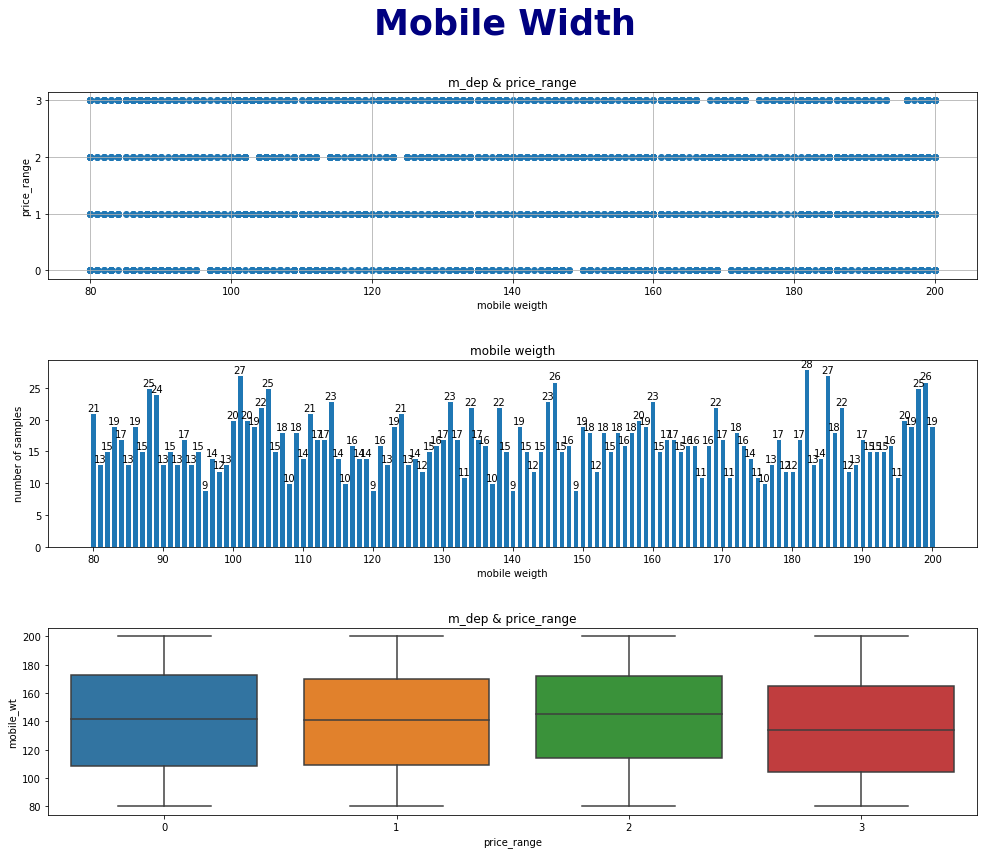

In [29]:
# Col 9 : m_wt

title = 'm_dep & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Mobile Width', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data.mobile_wt, data.price_range)
ax1.set(title=title, xlabel='mobile weigth', ylabel='price_range', xticks=np.arange(80, 201, 20), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data.mobile_wt.value_counts().sort_values().index
y = data.mobile_wt.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.8, edgecolor="white", linewidth=1)
ax2.bar_label(bar_container)
ax2.set(title='mobile weigth', xlabel='mobile weigth', ylabel='number of samples', xticks=np.arange(80, 210, 10), yticks=np.arange(0, 30, 5))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='mobile_wt', data=data).set(title=title, yticks=np.arange(80, 201, 20))

pt.show()

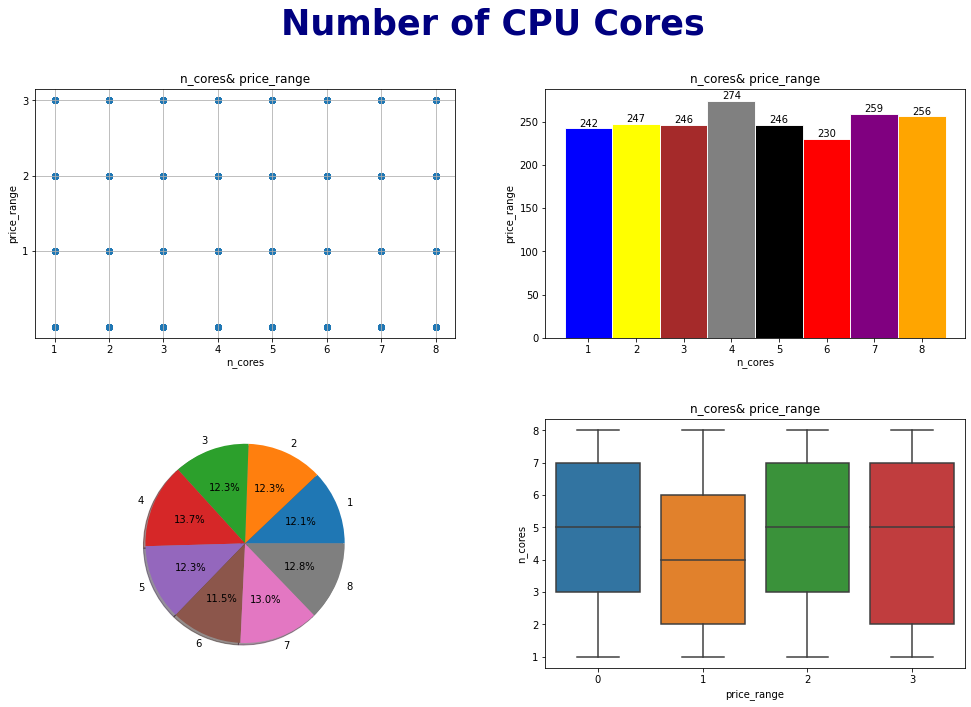

In [30]:
# Col 10 : n_cores               

title = 'n_cores& price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Number of CPU Cores', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(data.n_cores, data.price_range)
ax[0, 0].set(title=title, xlabel='n_cores', ylabel='price_range', xticks=np.arange(1, 9, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = data.n_cores.value_counts().sort_values().index
y = data.n_cores.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='n_cores', ylabel='price_range', xticks=np.arange(1, 9, 1))


# ax 3
d = data[['n_cores']]
d = d.groupby('n_cores').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=[1, 2, 3, 4, 5, 6, 7, 8], autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='n_cores', data=data).set(title=title, yticks=np.arange(1, 9, 1))

pt.show()

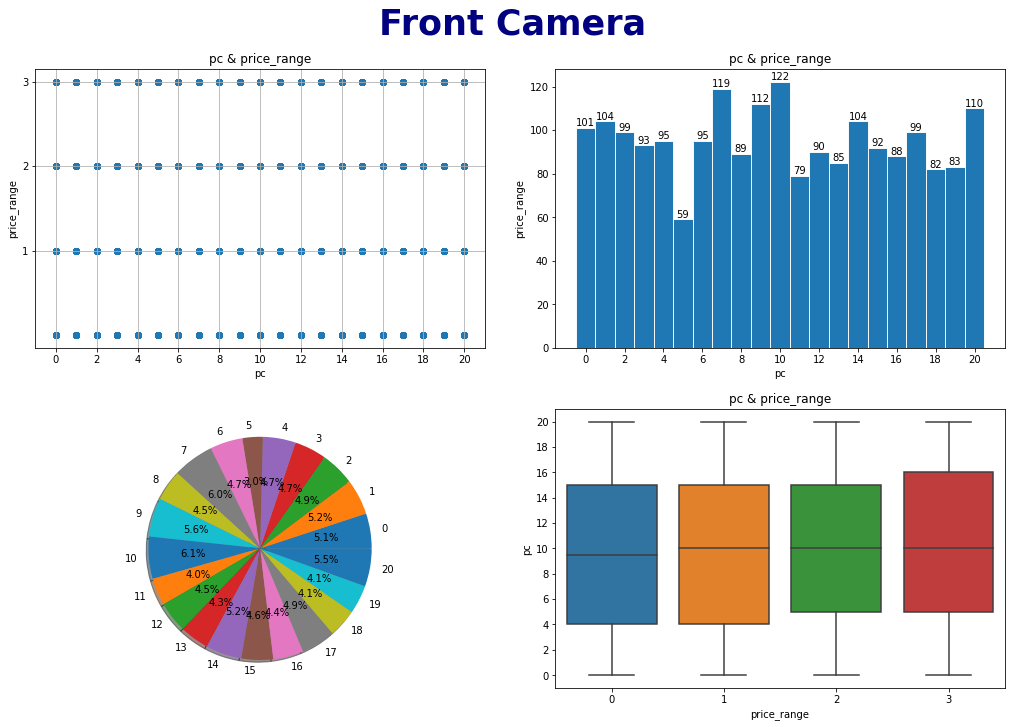

In [31]:
# Col 11 : pc               

title = 'pc & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Front Camera', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data.pc, data.price_range)
ax[0, 0].set(title=title, xlabel='pc', ylabel='price_range', xticks=np.arange(0, 21, 2), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = data.pc.value_counts().sort_values().index
y = data.pc.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='pc', ylabel='price_range', xticks=np.arange(0, 21, 2))


# ax 3
d = data[['pc']]
d = d.groupby('pc').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=np.arange(0, 21, 1), autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='pc', data=data).set(title=title, yticks=np.arange(0, 21, 2))

pt.show()

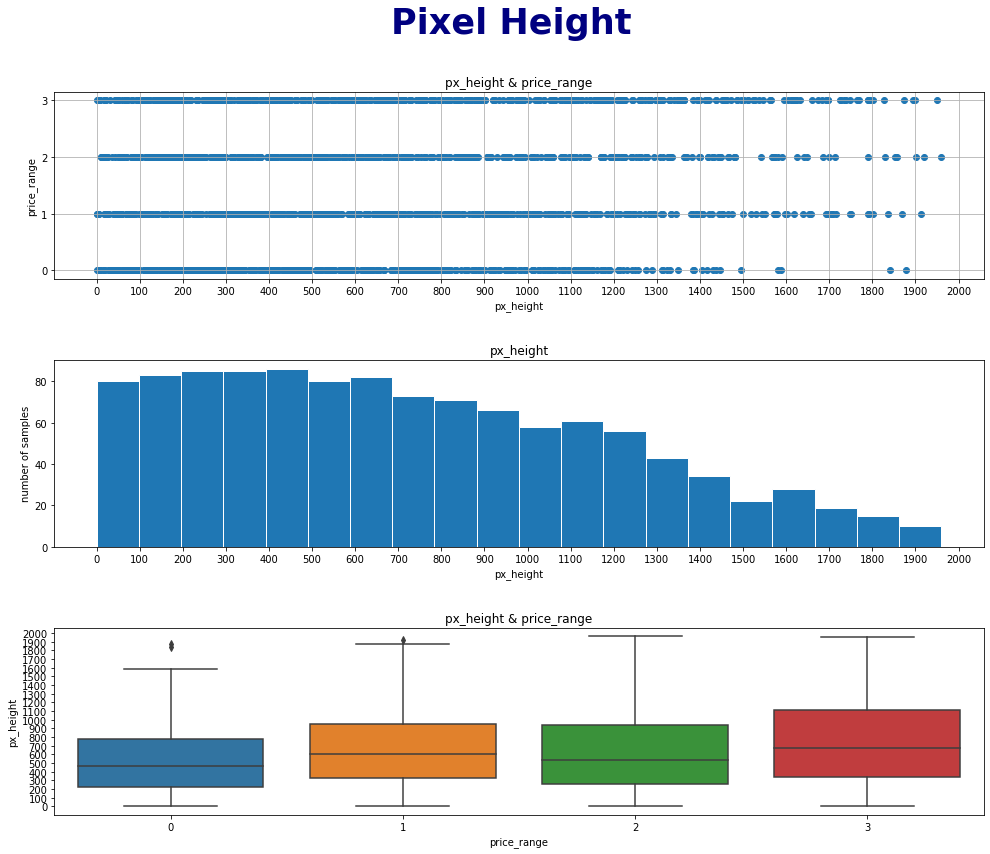

In [32]:
# Col 12 : px_height

title = 'px_height & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Pixel Height', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data.px_height, data.price_range)
ax1.set(title=title, xlabel='px_height', ylabel='price_range', xticks=np.arange(0, 2001, 100), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data.px_height.value_counts().sort_values().index
y = data.px_height.value_counts().sort_values()
ax2.hist(x, edgecolor='white', bins=20)
ax2.set(title='px_height', xlabel='px_height', ylabel='number of samples', xticks=np.arange(0, 2001, 100))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='px_height', data=data).set(title=title, yticks=np.arange(0, 2001, 100))

pt.show()

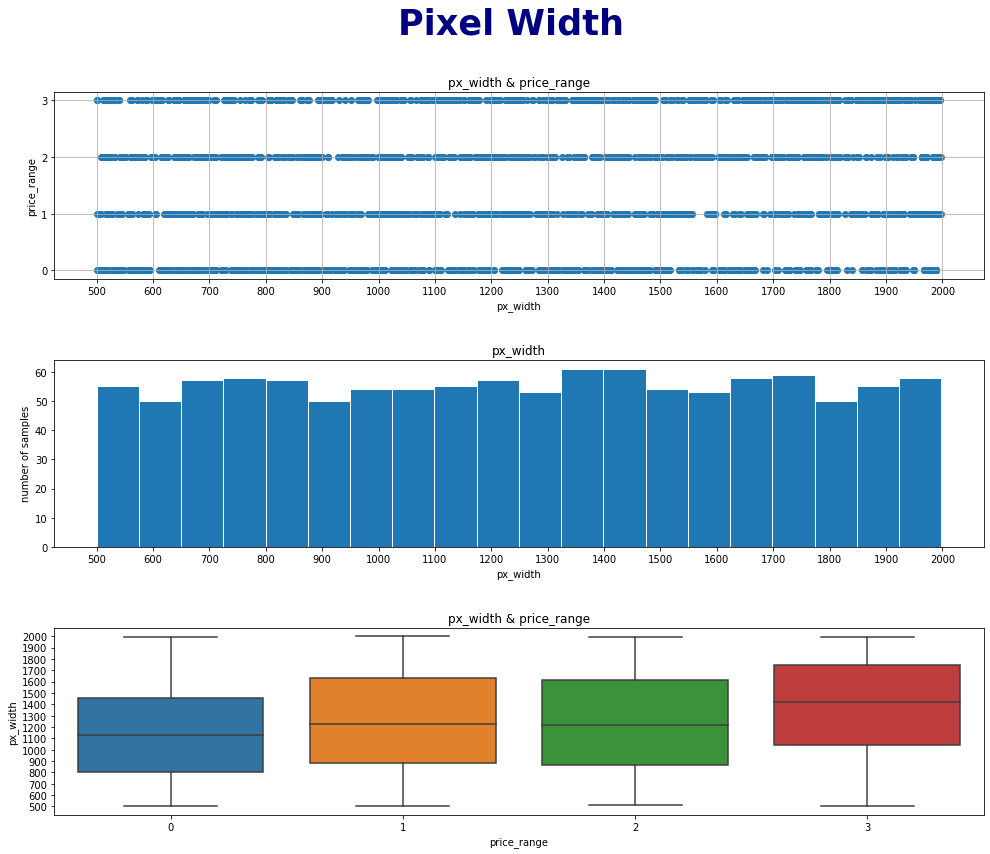

In [33]:
# Col 13 : px_width

title = 'px_width & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Pixel Width', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data.px_width, data.price_range)
ax1.set(title=title, xlabel='px_width', ylabel='price_range', xticks=np.arange(500, 2001, 100), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data.px_width.value_counts().sort_values().index
y = data.px_width.value_counts().sort_values()
ax2.hist(x, edgecolor='white', bins=20)
ax2.set(title='px_width', xlabel='px_width', ylabel='number of samples', xticks=np.arange(500, 2001, 100))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='px_width', data=data).set(title=title, yticks=np.arange(500, 2001, 100))

pt.show()

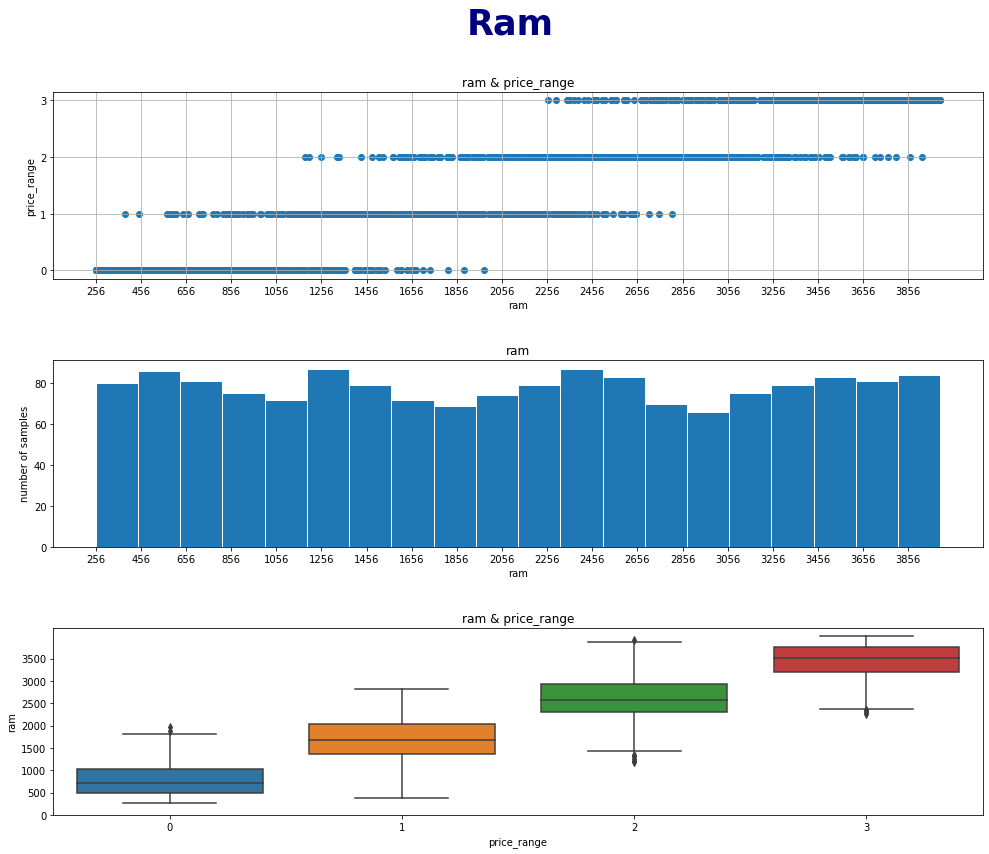

In [34]:
# Col 14 : ram

title = 'ram & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Ram', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data.ram, data.price_range)
ax1.set(title=title, xlabel='ram', ylabel='price_range', xticks=np.arange(256, 4000, 200), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data.ram.value_counts().sort_values().index
y = data.ram.value_counts().sort_values()
ax2.hist(x, edgecolor='white', bins=20)
ax2.set(title='ram', xlabel='ram', ylabel='number of samples', xticks=np.arange(256, 4000, 200))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='ram', data=data).set(title=title, yticks=np.arange(0, 4000, 500))

pt.show()


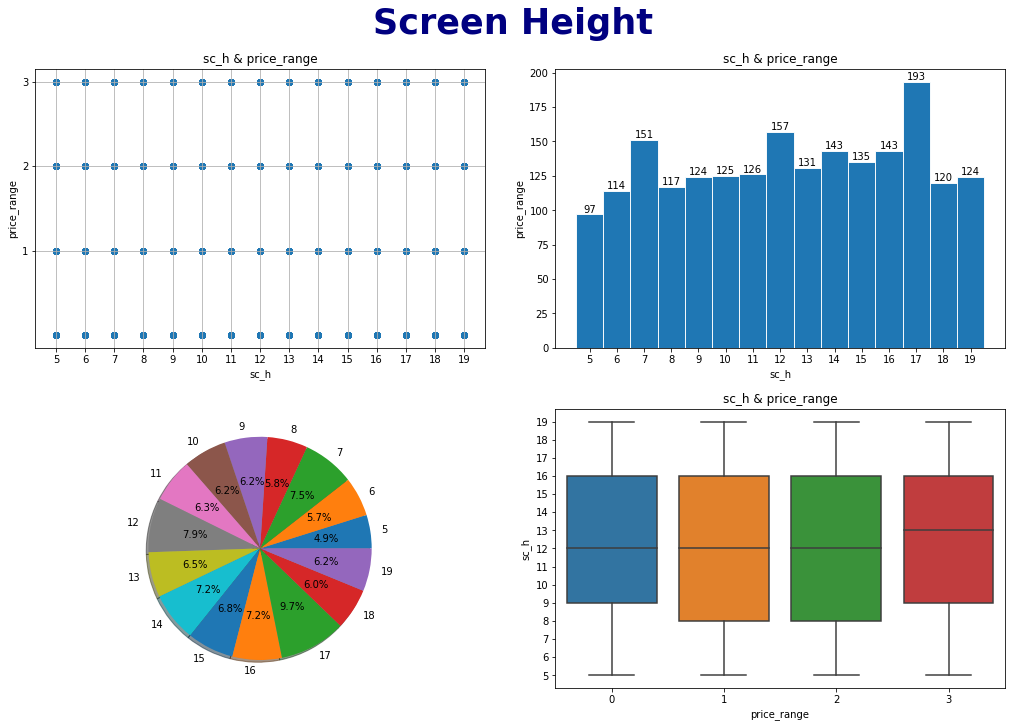

In [35]:
# Col 15 : sc_h               

title = 'sc_h & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Screen Height', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data.sc_h, data.price_range)
ax[0, 0].set(title=title, xlabel='sc_h', ylabel='price_range', xticks=np.arange(5, 20, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = data.sc_h.value_counts().sort_values().index
y = data.sc_h.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='sc_h', ylabel='price_range', xticks=np.arange(5, 20, 1))


# ax 3
d = data[['sc_h']]
d = d.groupby('sc_h').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=np.arange(5, 20, 1), autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='sc_h', data=data).set(title=title, yticks=np.arange(5, 20, 1))

pt.show()

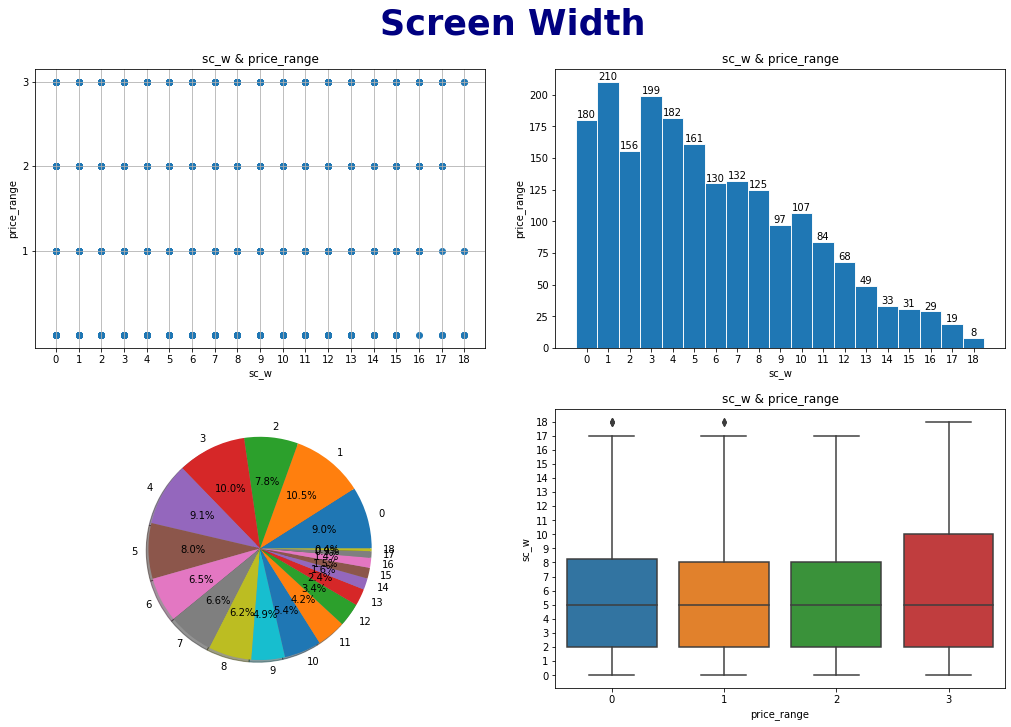

In [36]:
# Col 16 : sc_w               

title = 'sc_w & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Screen Width', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data.sc_w, data.price_range)
ax[0, 0].set(title=title, xlabel='sc_w', ylabel='price_range', xticks=np.arange(0, 19, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = data.sc_w.value_counts().sort_values().index
y = data.sc_w.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='sc_w', ylabel='price_range', xticks=np.arange(0, 19, 1))


# ax 3
d = data[['sc_w']]
d = d.groupby('sc_w').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=np.arange(0, 19, 1), autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='sc_w', data=data).set(title=title, yticks=np.arange(0, 19, 1))

pt.show()

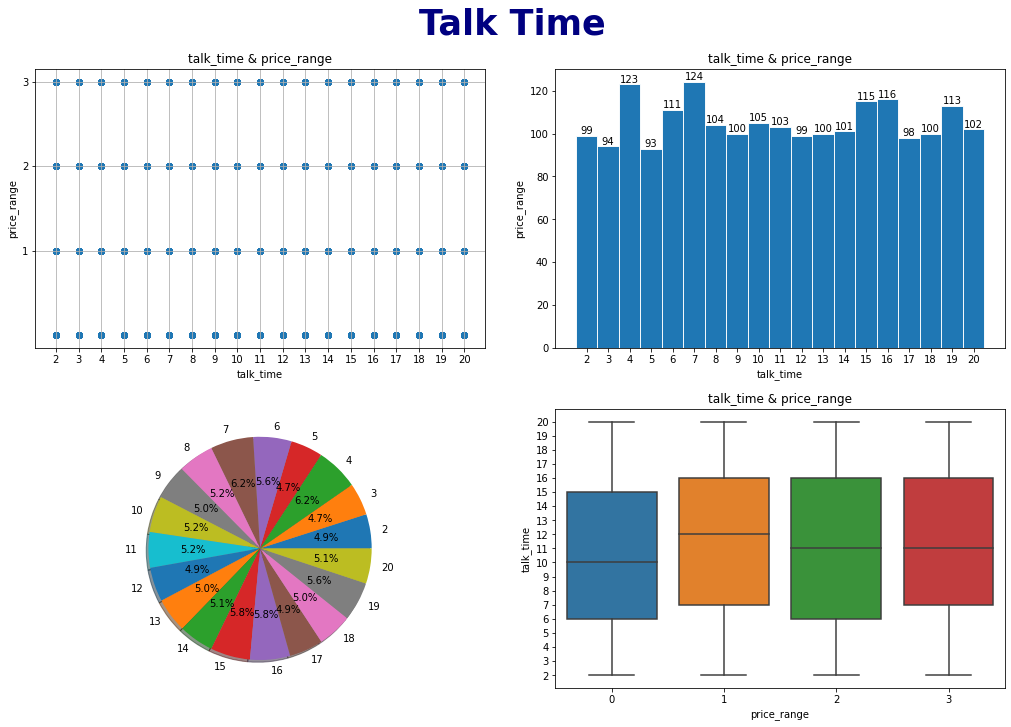

In [37]:
# Col 17 : talk_time               

title = 'talk_time & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Talk Time', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data.talk_time, data.price_range)
ax[0, 0].set(title=title, xlabel='talk_time', ylabel='price_range', xticks=np.arange(2, 21, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = data.talk_time.value_counts().sort_values().index
y = data.talk_time.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='talk_time', ylabel='price_range', xticks=np.arange(2, 21, 1))


# ax 3
d = data[['talk_time']]
d = d.groupby('talk_time').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=np.arange(2, 21, 1), autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='talk_time', data=data).set(title=title, yticks=np.arange(2, 21, 1))

pt.show()

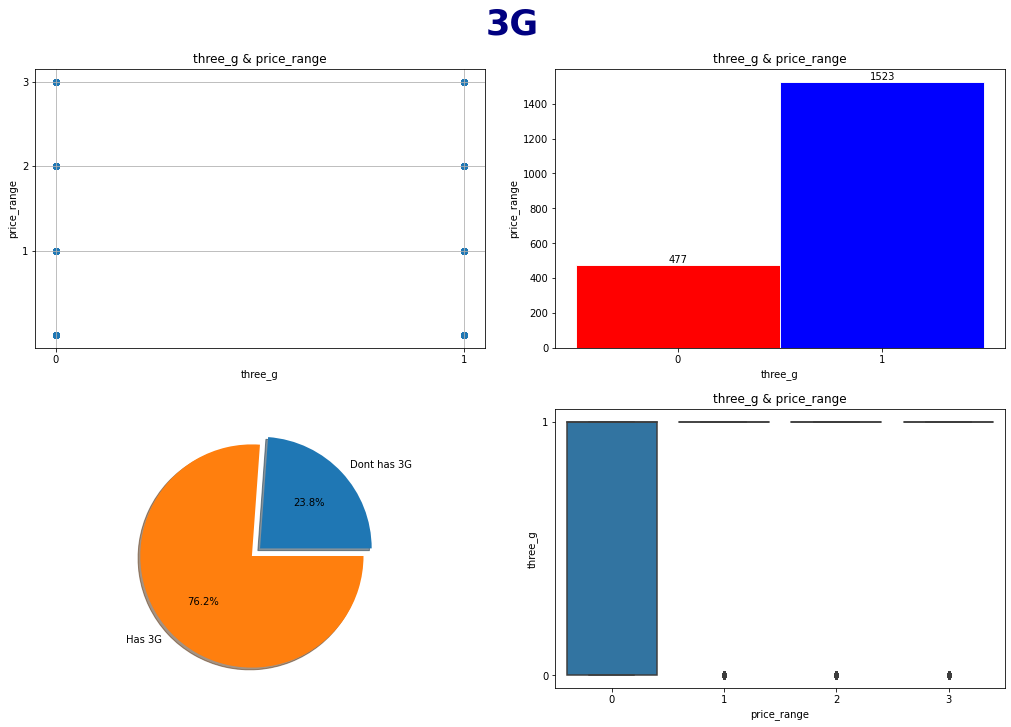

In [38]:
# Col 18 : three_g               

title = 'three_g & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('3G', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data.three_g, data.price_range)
ax[0, 0].set(title=title, xlabel='three_g', ylabel='price_range', xticks=np.arange(0, 2, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
c = ['red', 'blue']
x = data.three_g.value_counts().sort_values().index
y = data.three_g.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9, color=c)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='three_g', ylabel='price_range', xticks=np.arange(0, 2, 1))


# ax 3
d = data[['three_g']]
d = d.groupby('three_g').size()
labels = ['Dont has 3G', 'Has 3G']
explode = (0, 0.1)
ax[1, 0].pie(d, autopct='%1.1f%%', shadow=True, labels=labels, explode=explode)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='three_g', data=data).set(title=title, yticks=np.arange(0, 2, 1))

pt.show()

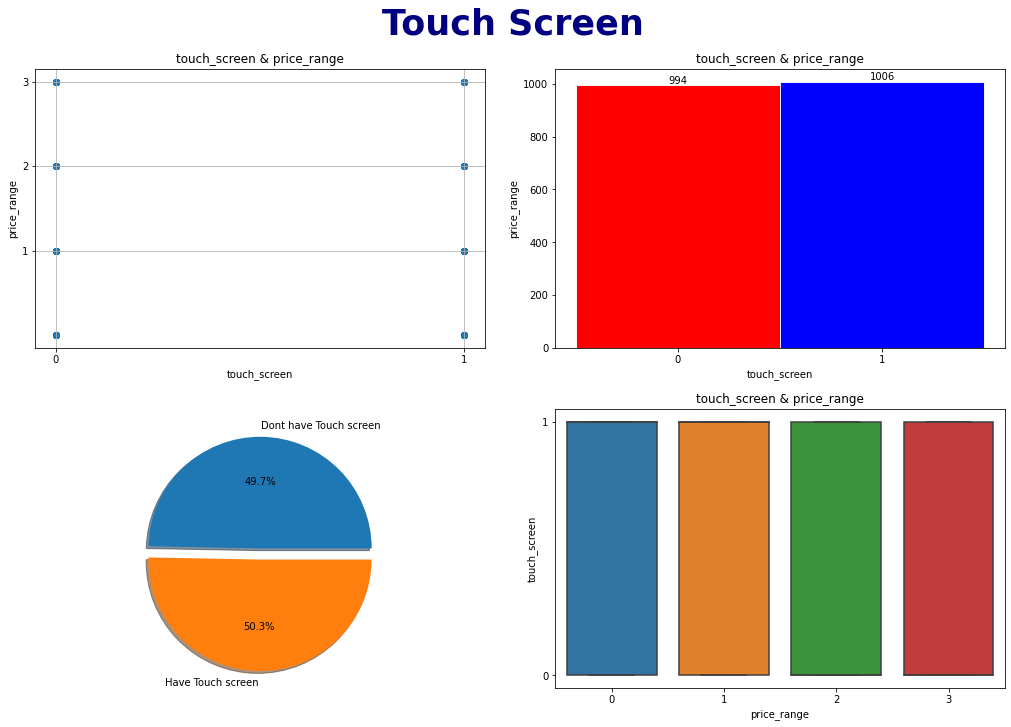

In [39]:
# Col 19 : touch_screen               

title = 'touch_screen & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Touch Screen', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data.touch_screen, data.price_range)
ax[0, 0].set(title=title, xlabel='touch_screen', ylabel='price_range', xticks=np.arange(0, 2, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
c = ['red', 'blue']
x = data.touch_screen.value_counts().sort_values().index
y = data.touch_screen.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9, color=c)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='touch_screen', ylabel='price_range', xticks=np.arange(0, 2, 1))


# ax 3
d = data[['touch_screen']]
d = d.groupby('touch_screen').size()
labels = ['Dont have Touch screen', 'Have Touch screen']
explode = (0, 0.1)
ax[1, 0].pie(d, autopct='%1.1f%%', shadow=True, labels=labels, explode=explode)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='touch_screen', data=data).set(title=title, yticks=np.arange(0, 2, 1))

pt.show()

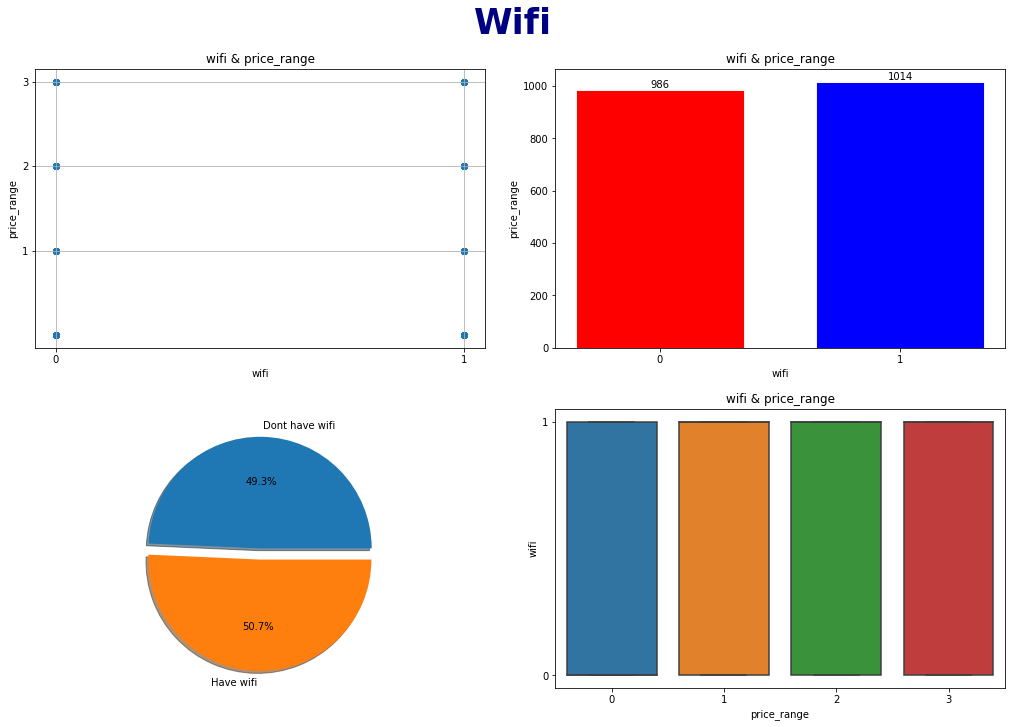

In [40]:
# Col 20 : wifi               

title = 'wifi & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Wifi', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data.wifi, data.price_range)
ax[0, 0].set(title=title, xlabel='wifi', ylabel='price_range', xticks=np.arange(0, 2, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
c = ['red', 'blue']
x = data.wifi.value_counts().sort_values().index
y = data.wifi.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=0.7, edgecolor="white", linewidth=0.9, color=c)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='wifi', ylabel='price_range', xticks=np.arange(0, 2, 1))


# ax 3
d = data[['wifi']]
d = d.groupby('wifi').size()
labels = ['Dont have wifi', 'Have wifi']
explode = (0, 0.1)
ax[1, 0].pie(d, autopct='%1.1f%%', shadow=True, labels=labels, explode=explode)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='wifi', data=data).set(title=title, yticks=np.arange(0, 2, 1))

pt.show()

In [41]:
print(data.columns)
print("_"*45)
print("number of Train columns : ", len(data.columns))

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
_____________________________________________
number of Train columns :  21


In [42]:
# second data set

In [43]:
data1=pd.read_csv('test.csv')

In [44]:
data1

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [45]:
data1.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [46]:
data1.tail()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0
999,1000,1270,1,0.5,0,4,1,35,0.1,140,...,19,457,608,2828,9,2,3,1,0,1


In [47]:
data1.shape

(1000, 21)

In [48]:
data1.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [50]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0


In [51]:
data1.mean()

id                500.5000
battery_power    1248.5100
blue                0.5160
clock_speed         1.5409
dual_sim            0.5170
fc                  4.5930
four_g              0.4870
int_memory         33.6520
m_dep               0.5175
mobile_wt         139.5110
n_cores             4.3280
pc                 10.0540
px_height         627.1210
px_width         1239.7740
ram              2138.9980
sc_h               11.9950
sc_w                5.3160
talk_time          11.0850
three_g             0.7560
touch_screen        0.5000
wifi                0.5070
dtype: float64

In [52]:
data1.median()

id                500.5
battery_power    1246.5
blue                1.0
clock_speed         1.5
dual_sim            1.0
fc                  3.0
four_g              0.0
int_memory         34.5
m_dep               0.5
mobile_wt         139.0
n_cores             4.0
pc                 10.0
px_height         564.5
px_width         1250.0
ram              2153.5
sc_h               12.0
sc_w                5.0
talk_time          11.0
three_g             1.0
touch_screen        0.5
wifi                1.0
dtype: float64

In [53]:
data1.min()

id                 1.0
battery_power    500.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 0.0
four_g             0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 0.0
px_height          0.0
px_width         501.0
ram              263.0
sc_h               5.0
sc_w               0.0
talk_time          2.0
three_g            0.0
touch_screen       0.0
wifi               0.0
dtype: float64

In [54]:
data1.max()

id               1000.0
battery_power    1999.0
blue                1.0
clock_speed         3.0
dual_sim            1.0
fc                 19.0
four_g              1.0
int_memory         64.0
m_dep               1.0
mobile_wt         200.0
n_cores             8.0
pc                 20.0
px_height        1907.0
px_width         1998.0
ram              3989.0
sc_h               19.0
sc_w               18.0
talk_time          20.0
three_g             1.0
touch_screen        1.0
wifi                1.0
dtype: float64

In [55]:
data1.drop_duplicates()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [56]:
a=data1.nunique()
print(a)

id               1000
battery_power     721
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         694
px_width          743
ram               872
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64


In [57]:
data1.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [58]:
data1.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [59]:
# Show all columns
columns = list(data1.columns)
for i, column in enumerate(columns):
    print(i+1, ':', column)

1 : id
2 : battery_power
3 : blue
4 : clock_speed
5 : dual_sim
6 : fc
7 : four_g
8 : int_memory
9 : m_dep
10 : mobile_wt
11 : n_cores
12 : pc
13 : px_height
14 : px_width
15 : ram
16 : sc_h
17 : sc_w
18 : talk_time
19 : three_g
20 : touch_screen
21 : wifi


In [60]:
data1.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [61]:
# Create a DataFrame with Train and Test
# Total[ : 2000]---> Train
# Total[2000 : ]---> Test
Target = data.price_range
data.drop(columns='price_range', inplace=True)

Total = pd.concat([data, data1], ignore_index=True)
Total

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,996.0
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,997.0
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,998.0
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,999.0


In [62]:
# Add Target column to Train2
data1.insert(20, 'price_range', Target)
data1

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,price_range,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,2,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,2,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,2,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,3,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,2,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,3,0


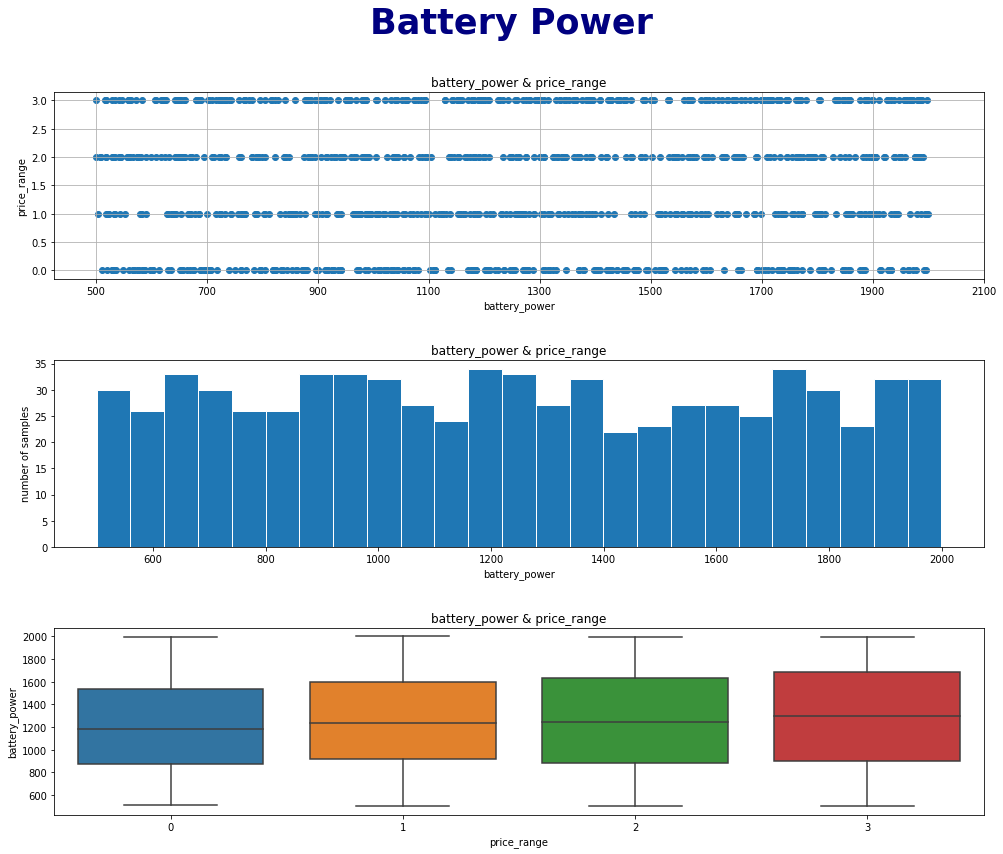

In [63]:
# Col 1 : battery_power

title = 'battery_power & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Battery Power', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax1 ---> scatter
ax1.scatter(data1.battery_power, data1.price_range)
ax1.set(title=title, xlabel='battery_power', ylabel='price_range', xticks=np.arange(500, 2200, 200))
ax1.grid()


# ax 2
x = data1.battery_power.value_counts().sort_values().index
y = data1.battery_power.value_counts().sort_values()
ax2.hist(x, bins=25, histtype='bar', edgecolor='white')
ax2.set(title=title, xlabel='battery_power', ylabel='number of samples')


# ax3 ---> boxplot
sns.boxplot(x='price_range', y='battery_power', data=data1).set(title=title)

pt.show()

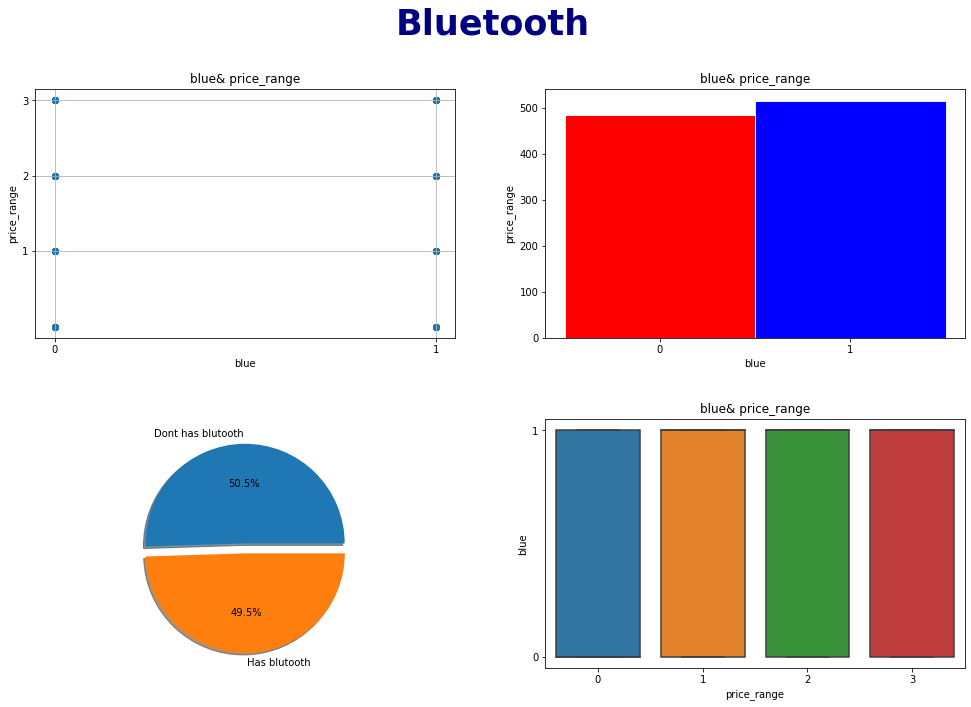

In [64]:
# Col 2 : blue               

title = 'blue& price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Bluetooth', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(data1.blue, data1.price_range)
ax[0, 0].set(title=title, xlabel='blue', ylabel='price_range', xticks=np.arange(0, 1.5), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue']
x = data1.blue.value_counts().sort_values().index
y = data1.blue.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].set(title=title, xlabel='blue', ylabel='price_range', xticks=np.arange(0, 1.5))


# ax 3
d = data[['blue']]
d = d.groupby('blue').size()
labels = ['Dont has blutooth', 'Has blutooth']
explode = (0, 0.1)
ax[1, 0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='blue', data=data1).set(title=title, yticks=np.arange(0, 1.5))

pt.show()

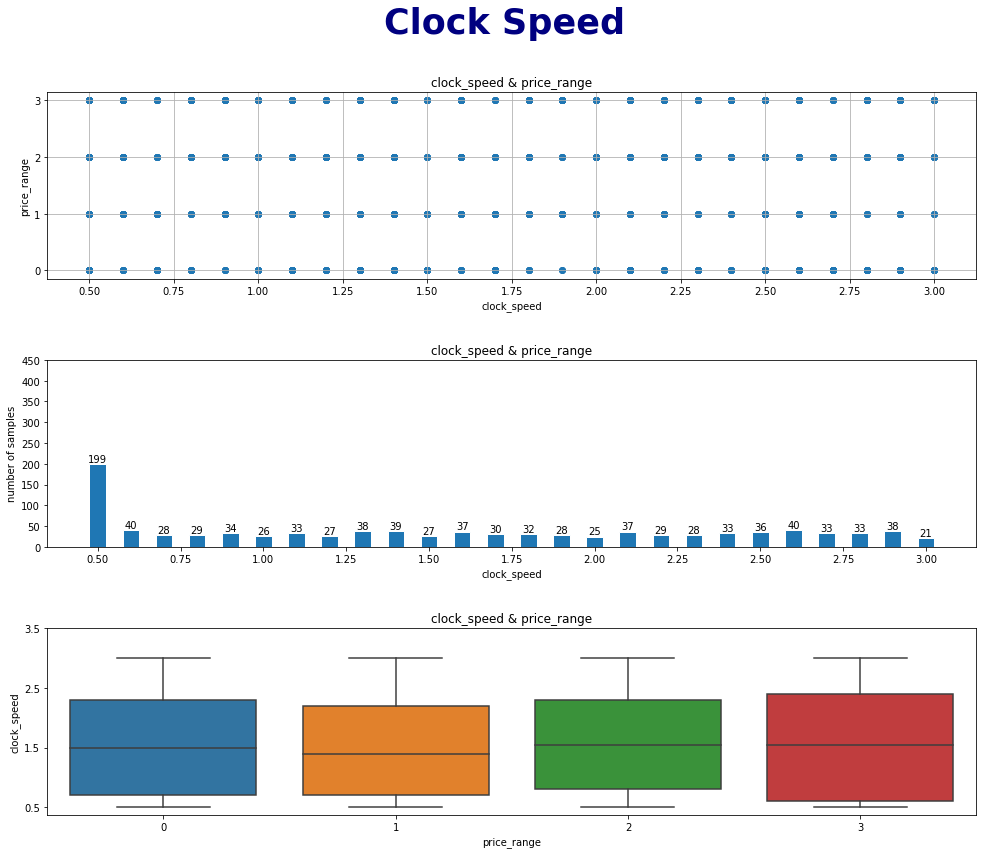

In [65]:
# Col 3 : clock_speed

title = 'clock_speed & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Clock Speed', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax1 ---> scatter
ax1.scatter(data1.clock_speed, data1.price_range)
ax1.set(title=title, xlabel='clock_speed', ylabel='price_range', xticks=np.arange(0.5, 3.25, 0.25), yticks=np.arange(0, 4))
ax1.grid()


# ax 2
x = data1.clock_speed.value_counts().sort_values().index
y = data1.clock_speed.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.05, edgecolor="white")
ax2.bar_label(bar_container)
ax2.set(title=title, xlabel='clock_speed', ylabel='number of samples', xticks=np.arange(0.5, 3.1, 0.25), yticks=np.arange(0, 460, 50))


# ax3 ---> boxplot
sns.boxplot(x='price_range', y='clock_speed', data=data1).set(title=title, yticks=np.arange(0.5, 4))


pt.show()

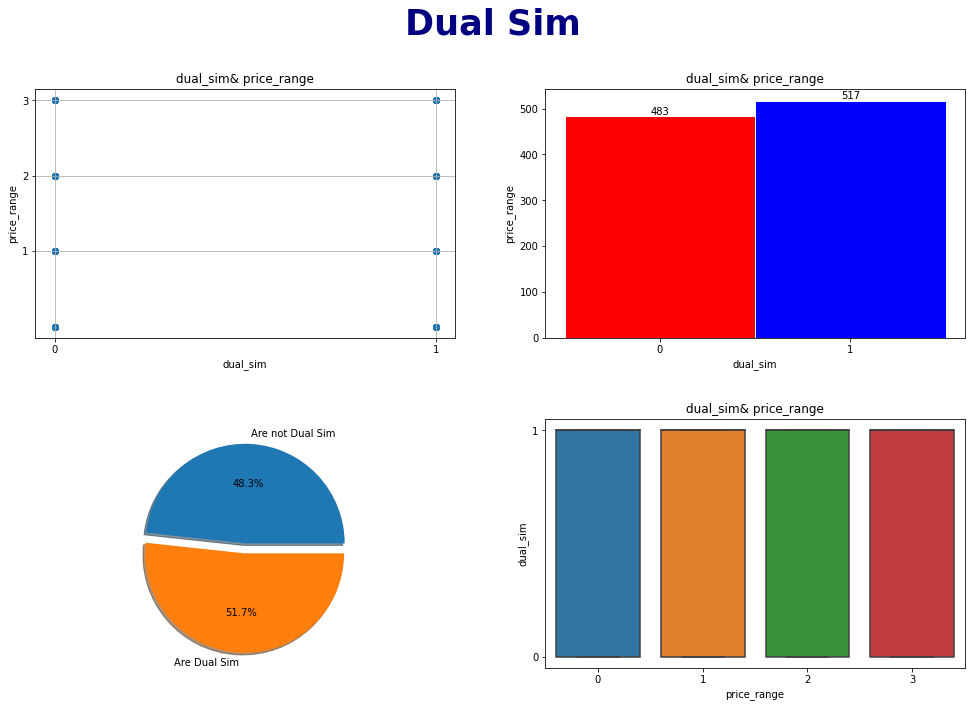

In [68]:
# Col 4 : dual_sim               

title = 'dual_sim& price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Dual Sim', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(data1.dual_sim, data1.price_range)
ax[0, 0].set(title=title, xlabel='dual_sim', ylabel='price_range', xticks=np.arange(0, 1.5), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue']
x = data1.dual_sim.value_counts().sort_values().index
y = data1.dual_sim.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='dual_sim', ylabel='price_range', xticks=np.arange(0, 1.5))


# ax 3
d = data1[['dual_sim']]
d = d.groupby('dual_sim').size()
labels = ['Are not Dual Sim', 'Are Dual Sim']
explode = (0, 0.1)
ax[1, 0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='dual_sim', data=data1).set(title=title, yticks=np.arange(0, 1.5))

pt.show()

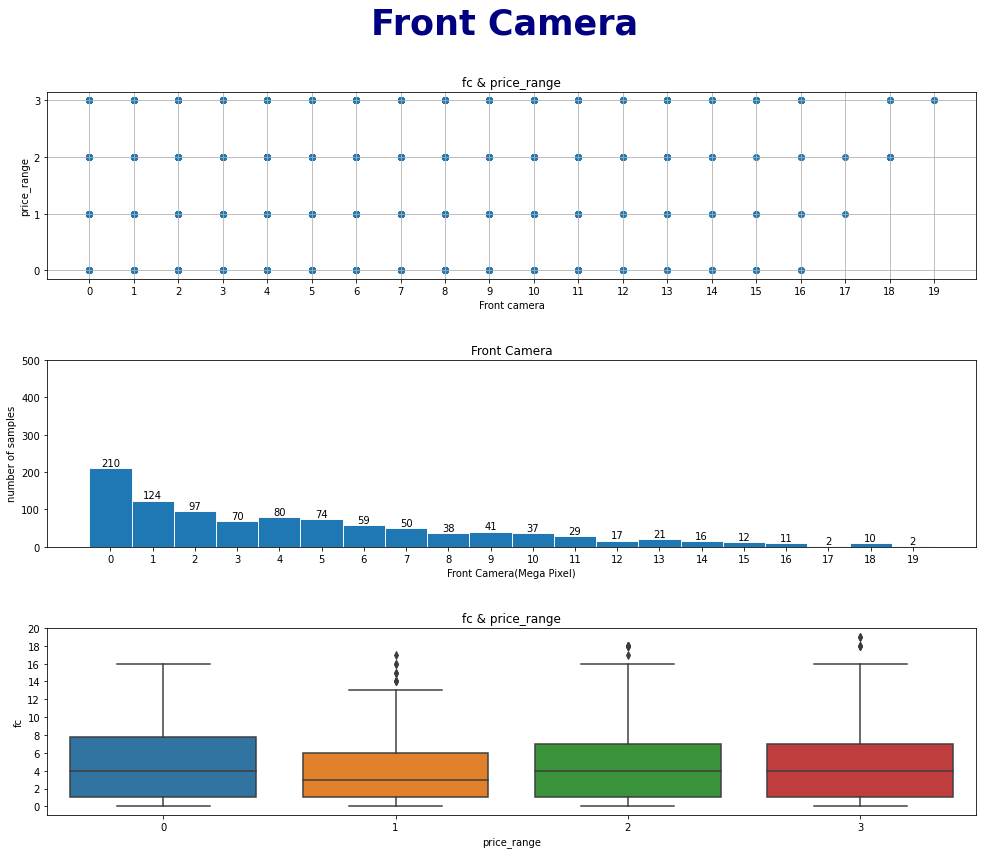

In [69]:
# Col 5 : fc (Front camera)

title = 'fc & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Front Camera', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data1.fc, data1.price_range)
ax1.set(title=title, xlabel='Front camera', ylabel='price_range', xticks=np.arange(0, 20), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data1.fc.value_counts().sort_values().index
y = data1.fc.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='Front Camera', xlabel='Front Camera(Mega Pixel)', ylabel='number of samples', xticks=np.arange(0, 20, 1), yticks=np.arange(0, 510, 100))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='fc', data=data1).set(title=title, yticks=np.arange(0, 21, 2))

pt.show()

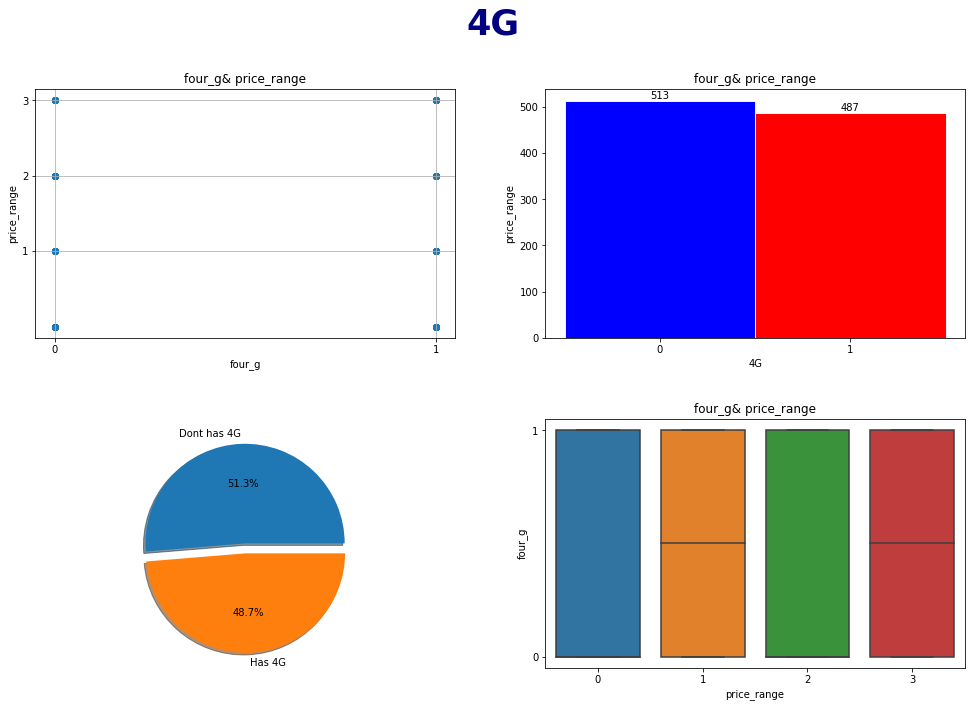

In [71]:
# Col 6 : four_g               

title = 'four_g& price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('4G', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(data1.four_g, data1.price_range)
ax[0, 0].set(title=title, xlabel='four_g', ylabel='price_range', xticks=np.arange(0, 1.5), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue']
x = data1.four_g.value_counts().sort_values().index
y = data1.four_g.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='4G', ylabel='price_range', xticks=np.arange(0, 1.5))


# ax 3
d = data1[['four_g']]
d = d.groupby('four_g').size()
labels = ['Dont has 4G', 'Has 4G']
explode = (0, 0.1)
ax[1, 0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='four_g', data=data1).set(title=title, yticks=np.arange(0, 1.5))

pt.show()

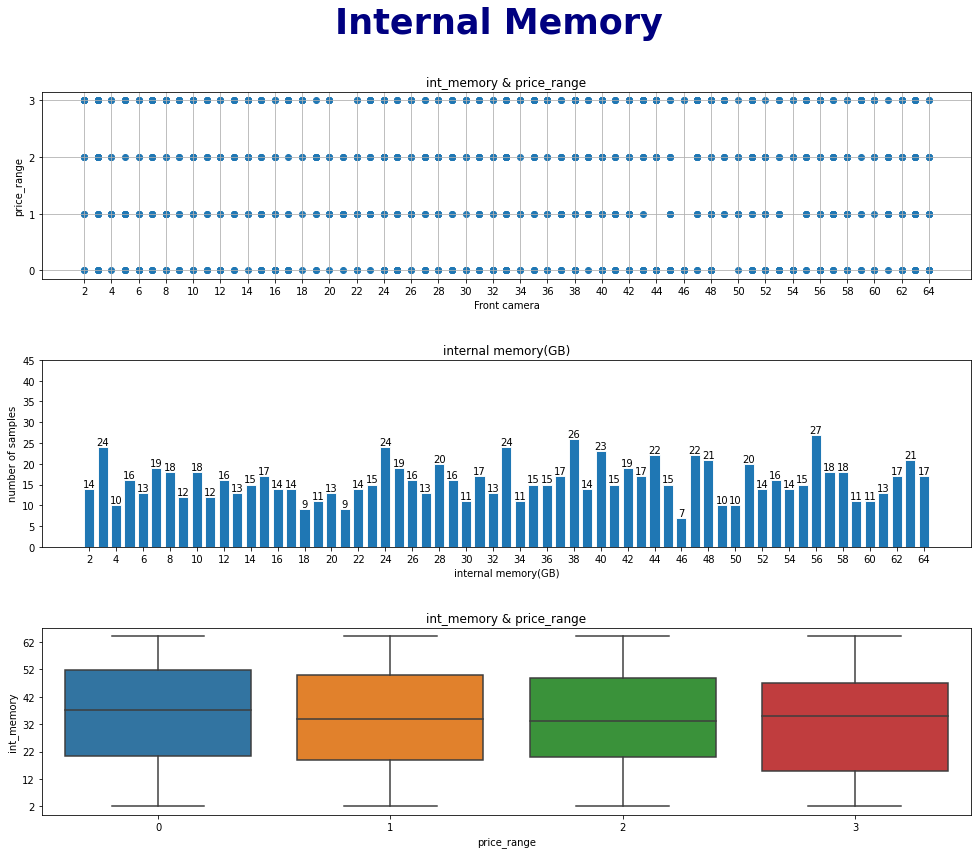

In [72]:
# Col 7 : int_memory

title = 'int_memory & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Internal Memory', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data1.int_memory, data1.price_range)
ax1.set(title=title, xlabel='Front camera', ylabel='price_range', xticks=np.arange(2, 65, 2), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data1.int_memory.value_counts().sort_values().index
y = data1.int_memory.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.75, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='internal memory(GB)', xlabel='internal memory(GB)', ylabel='number of samples', xticks=np.arange(2, 65, 2), yticks=np.arange(0, 50, 5))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='int_memory', data=data1).set(title=title, yticks=np.arange(2, 70, 10))

pt.show()

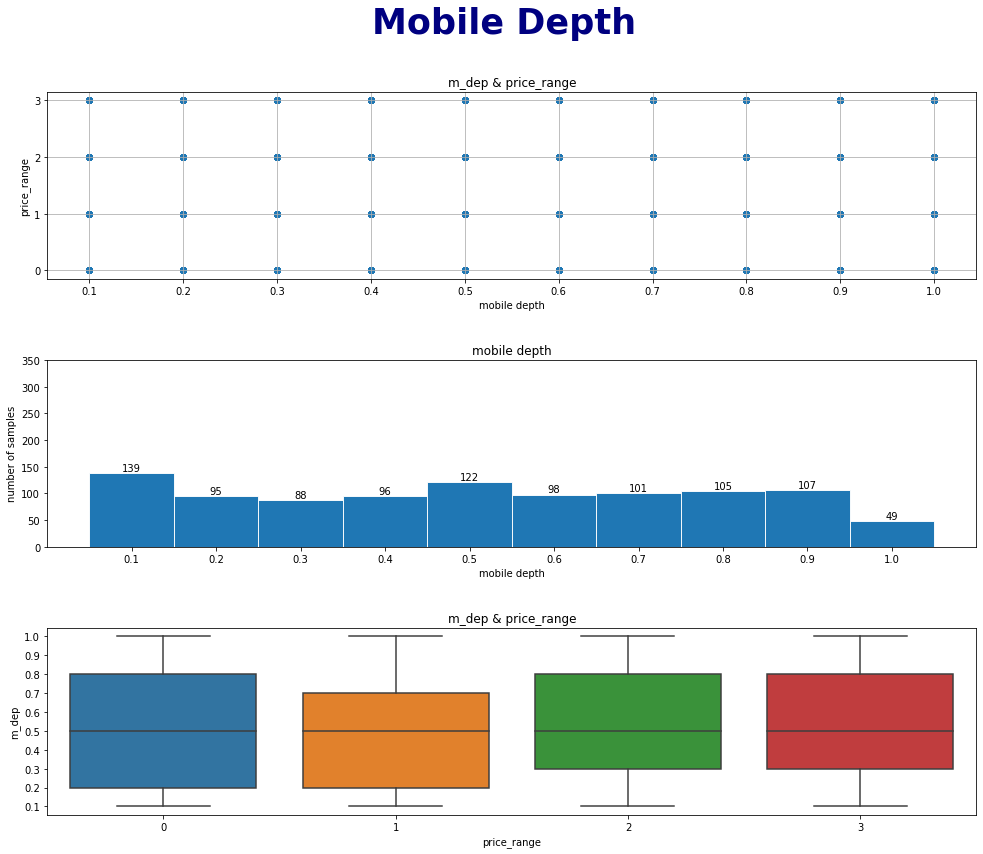

In [73]:
# Col 8 : m_dep

title = 'm_dep & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Mobile Depth', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data1.m_dep, data1.price_range)
ax1.set(title=title, xlabel='mobile depth', ylabel='price_range', xticks=np.arange(0.1, 1.1, 0.1), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data1.m_dep.value_counts().sort_values().index
y = data1.m_dep.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.1, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='mobile depth', xlabel='mobile depth', ylabel='number of samples', xticks=np.arange(0.1, 1.1, 0.1), yticks=np.arange(0, 360, 50))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='m_dep', data=data1).set(title=title, yticks=np.arange(0.1, 1.1, 0.1))

pt.show()

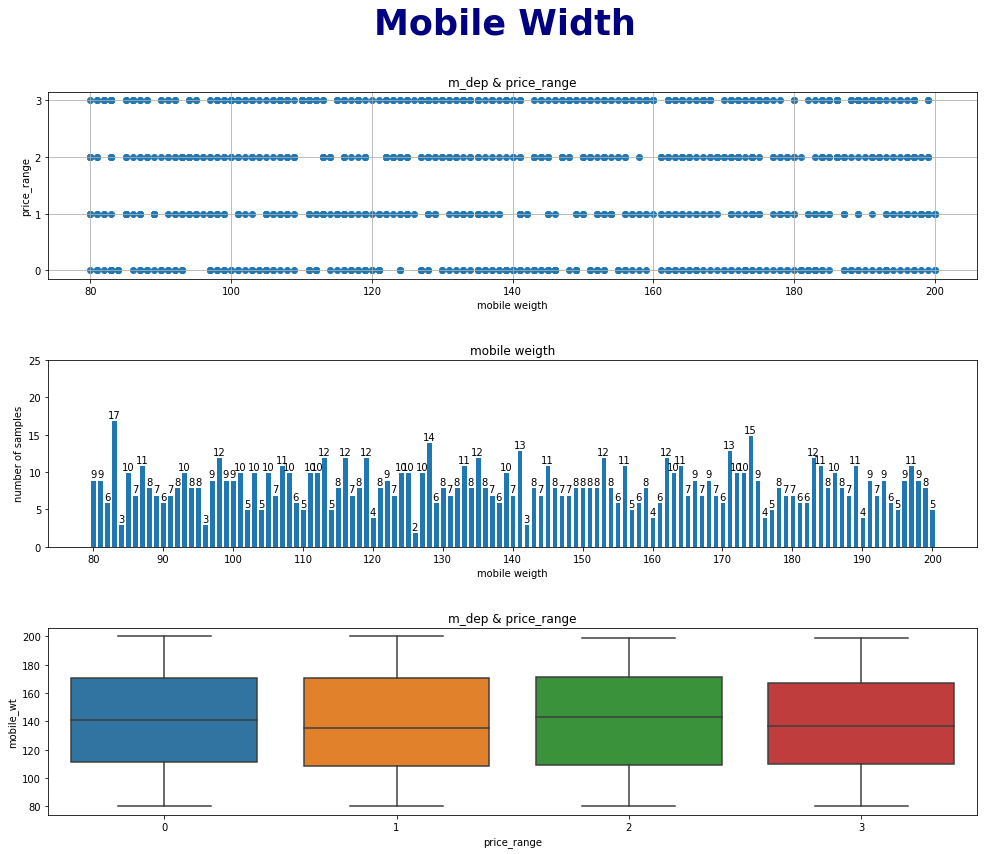

In [75]:
# Col 9 : m_wt

title = 'm_dep & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Mobile Width', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data1.mobile_wt, data1.price_range)
ax1.set(title=title, xlabel='mobile weigth', ylabel='price_range', xticks=np.arange(80, 201, 20), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data1.mobile_wt.value_counts().sort_values().index
y = data1.mobile_wt.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.8, edgecolor="white", linewidth=1)
ax2.bar_label(bar_container)
ax2.set(title='mobile weigth', xlabel='mobile weigth', ylabel='number of samples', xticks=np.arange(80, 210, 10), yticks=np.arange(0, 30, 5))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='mobile_wt', data=data1).set(title=title, yticks=np.arange(80, 201, 20))

pt.show()

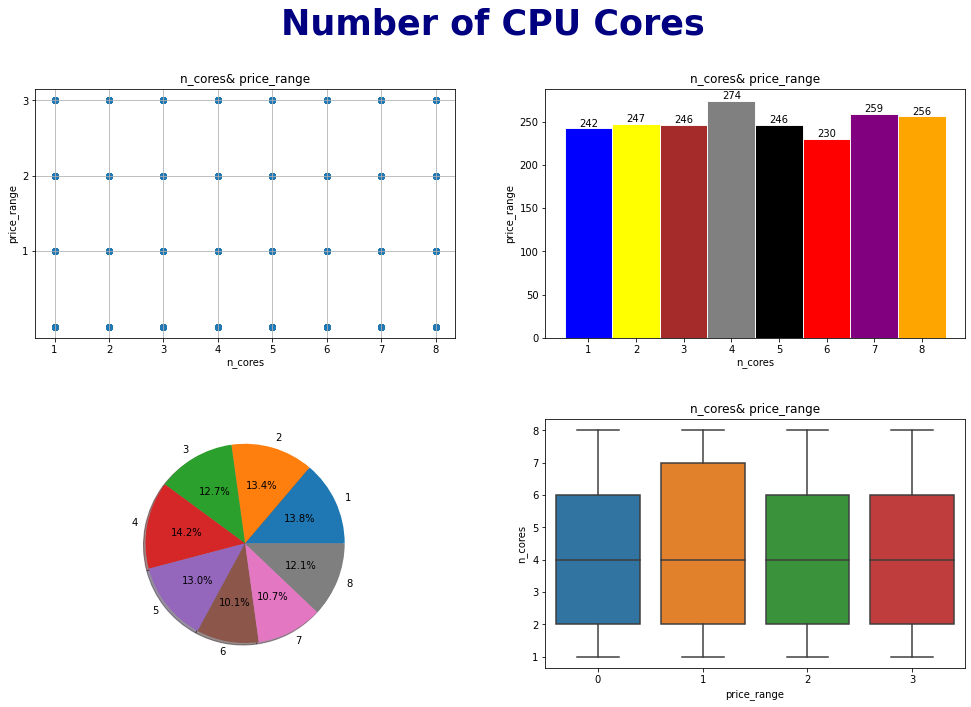

In [76]:
# Col 10 : n_cores               

title = 'n_cores& price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Number of CPU Cores', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(data1.n_cores, data1.price_range)
ax[0, 0].set(title=title, xlabel='n_cores', ylabel='price_range', xticks=np.arange(1, 9, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = data.n_cores.value_counts().sort_values().index
y = data.n_cores.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='n_cores', ylabel='price_range', xticks=np.arange(1, 9, 1))


# ax 3
d = data1[['n_cores']]
d = d.groupby('n_cores').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=[1, 2, 3, 4, 5, 6, 7, 8], autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='n_cores', data=data1).set(title=title, yticks=np.arange(1, 9, 1))

pt.show()

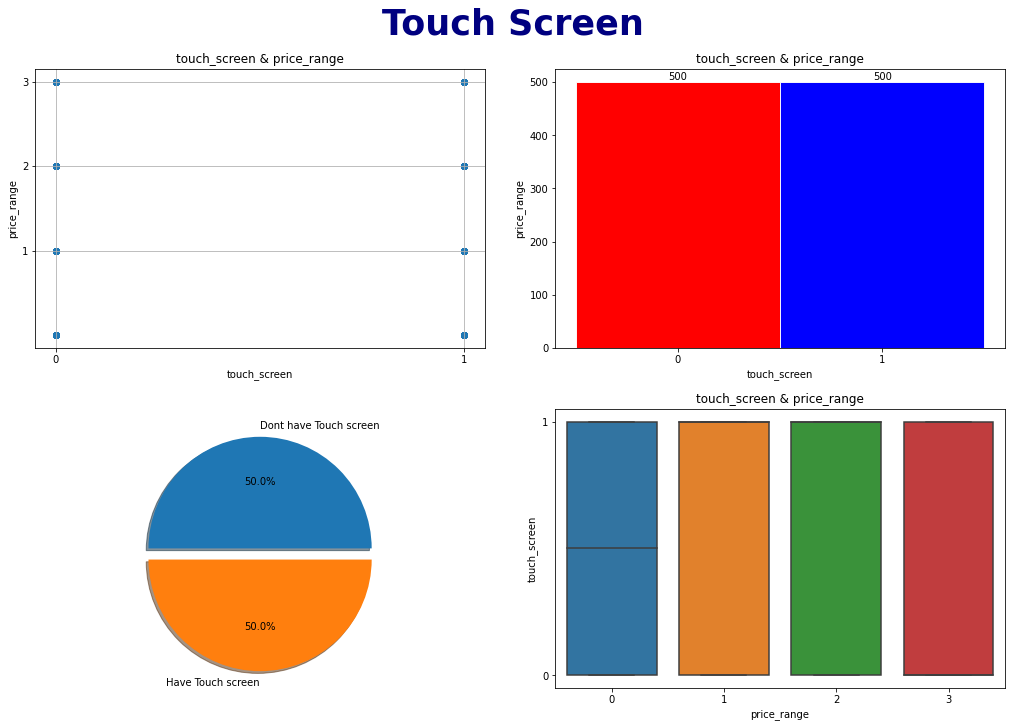

In [77]:
# Col 19 : touch_screen               

title = 'touch_screen & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Touch Screen', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data1.touch_screen, data1.price_range)
ax[0, 0].set(title=title, xlabel='touch_screen', ylabel='price_range', xticks=np.arange(0, 2, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
c = ['red', 'blue']
x = data1.touch_screen.value_counts().sort_values().index
y = data1.touch_screen.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9, color=c)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='touch_screen', ylabel='price_range', xticks=np.arange(0, 2, 1))


# ax 3
d = data1[['touch_screen']]
d = d.groupby('touch_screen').size()
labels = ['Dont have Touch screen', 'Have Touch screen']
explode = (0, 0.1)
ax[1, 0].pie(d, autopct='%1.1f%%', shadow=True, labels=labels, explode=explode)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='touch_screen', data=data1).set(title=title, yticks=np.arange(0, 2, 1))

pt.show()

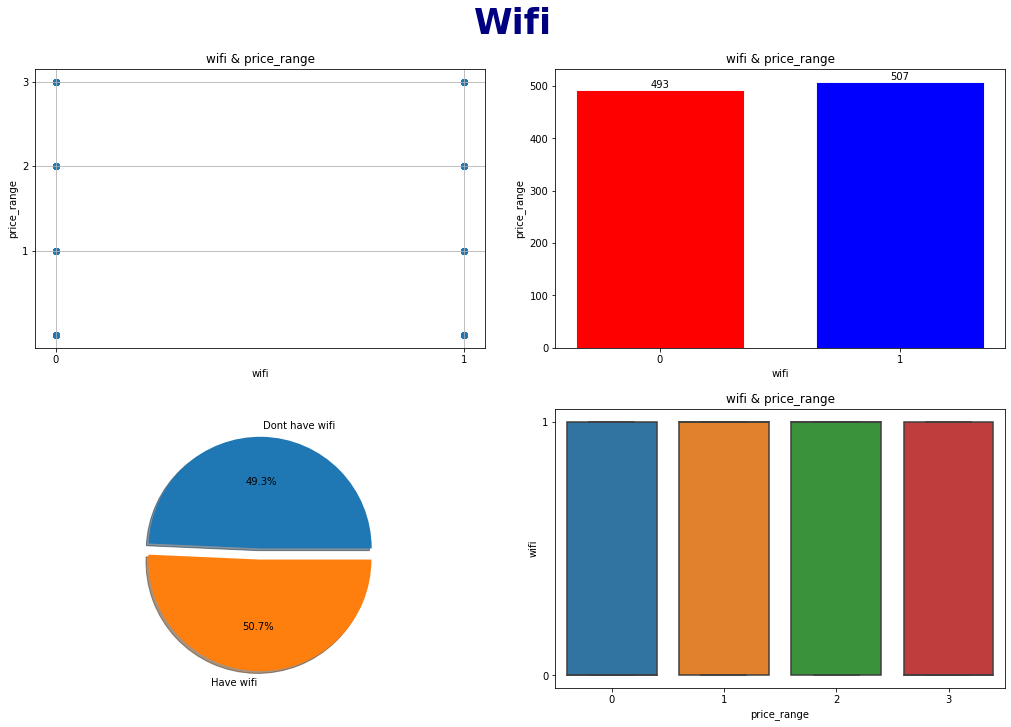

In [78]:
# Col 20 : wifi               

title = 'wifi & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Wifi', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data1.wifi, data1.price_range)
ax[0, 0].set(title=title, xlabel='wifi', ylabel='price_range', xticks=np.arange(0, 2, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
c = ['red', 'blue']
x = data1.wifi.value_counts().sort_values().index
y = data1.wifi.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=0.7, edgecolor="white", linewidth=0.9, color=c)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='wifi', ylabel='price_range', xticks=np.arange(0, 2, 1))


# ax 3
d = data1[['wifi']]
d = d.groupby('wifi').size()
labels = ['Dont have wifi', 'Have wifi']
explode = (0, 0.1)
ax[1, 0].pie(d, autopct='%1.1f%%', shadow=True, labels=labels, explode=explode)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='wifi', data=data1).set(title=title, yticks=np.arange(0, 2, 1))

pt.show()

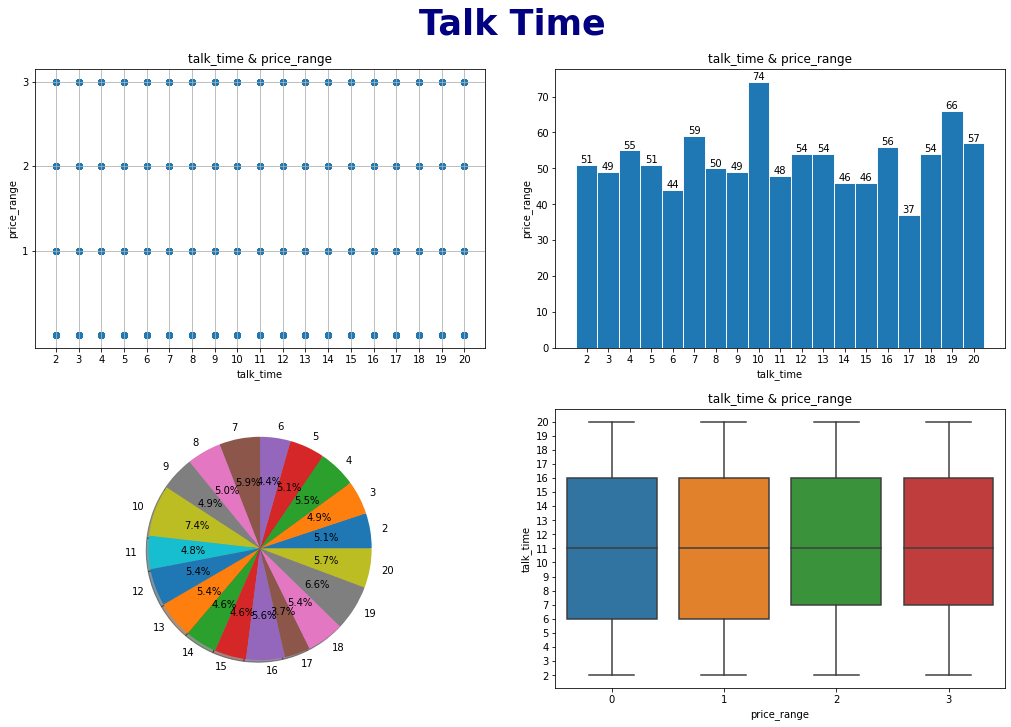

In [79]:
# Col 17 : talk_time               

title = 'talk_time & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Talk Time', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data1.talk_time, data1.price_range)
ax[0, 0].set(title=title, xlabel='talk_time', ylabel='price_range', xticks=np.arange(2, 21, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = data1.talk_time.value_counts().sort_values().index
y = data1.talk_time.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='talk_time', ylabel='price_range', xticks=np.arange(2, 21, 1))


# ax 3
d = data1[['talk_time']]
d = d.groupby('talk_time').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=np.arange(2, 21, 1), autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='talk_time', data=data1).set(title=title, yticks=np.arange(2, 21, 1))

pt.show()

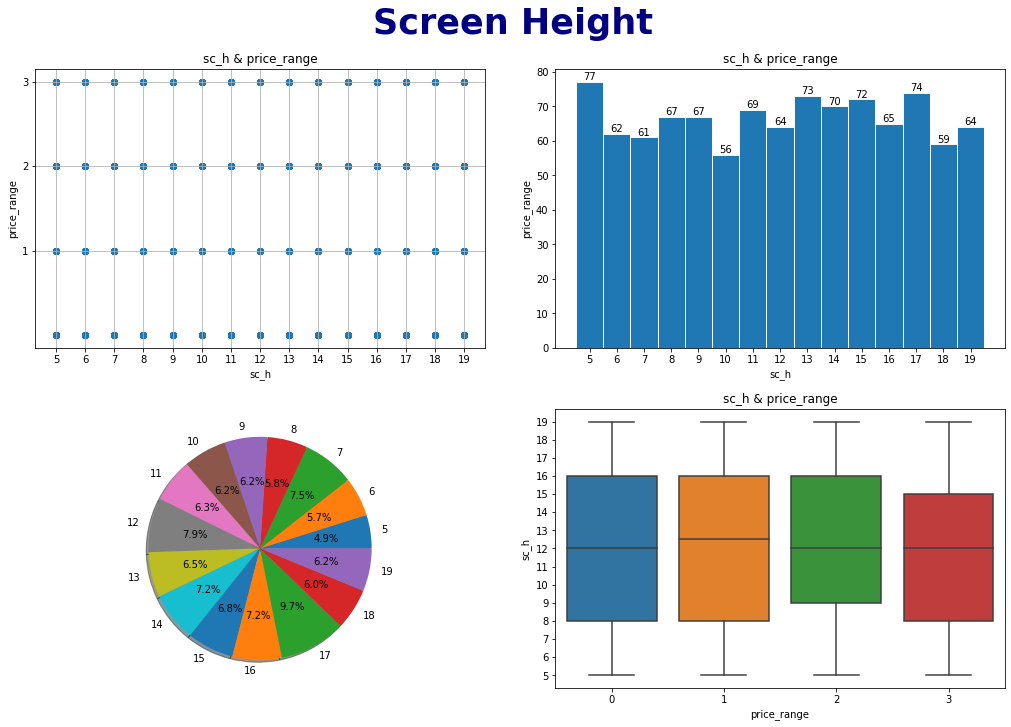

In [80]:
# Col 15 : sc_h               

title = 'sc_h & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Screen Height', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data1.sc_h, data1.price_range)
ax[0, 0].set(title=title, xlabel='sc_h', ylabel='price_range', xticks=np.arange(5, 20, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = data1.sc_h.value_counts().sort_values().index
y = data1.sc_h.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='sc_h', ylabel='price_range', xticks=np.arange(5, 20, 1))


# ax 3
d = data[['sc_h']]
d = d.groupby('sc_h').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=np.arange(5, 20, 1), autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='sc_h', data=data1).set(title=title, yticks=np.arange(5, 20, 1))

pt.show()

In [81]:
#Thanks